In [11]:
import random
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [12]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [24]:
val_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


In [ ]:
train_df = pd.read_csv('C:/Users/김승우/Desktop/파이썬/train.csv')
train_df = train_df.drop(columns=['ID'])
val_df = pd.read_csv('C:/Users/김승우/Desktop/파이썬/val.csv')
val_df = val_df.drop(columns=['ID'])
val_re=val_df.drop(columns=['Class'])

In [38]:
val_fraud=val_df[val_df["Class"]==1]
print(val_fraud)

              V1         V2         V3         V4         V5        V6  \
71     -3.043541  -3.157307   1.088463   2.288644   1.359805 -1.064823   
641     0.316459   3.809076  -5.615159   6.047445   1.554026 -2.651353   
677     0.857321   4.093912  -7.423894   7.380245   0.973366 -2.730762   
836    -1.426623   4.141986  -9.804103   6.666273  -4.749527 -2.073129   
1196  -16.367923   9.223692 -23.270631  11.844777  -9.462037 -2.450444   
1201  -16.917468   9.669900 -23.736443  11.824990  -9.830548 -2.514829   
1547  -18.474868  11.586381 -21.402917   6.038515 -14.451158 -4.146524   
3055   -3.896583   4.518355  -4.454027   5.547453  -4.121459 -1.163407   
4039    1.159373   2.844795  -4.050680   4.777701   2.948980 -2.010361   
4267  -13.897206   6.344280 -14.281666   5.581009 -12.887133 -3.146176   
4396  -19.139733   9.286847 -20.134992   7.818673 -15.652208 -1.668348   
7702   -2.335655   2.225380  -3.379450   2.178538  -3.568264  0.316814   
9326    1.080433   0.962831  -0.278065

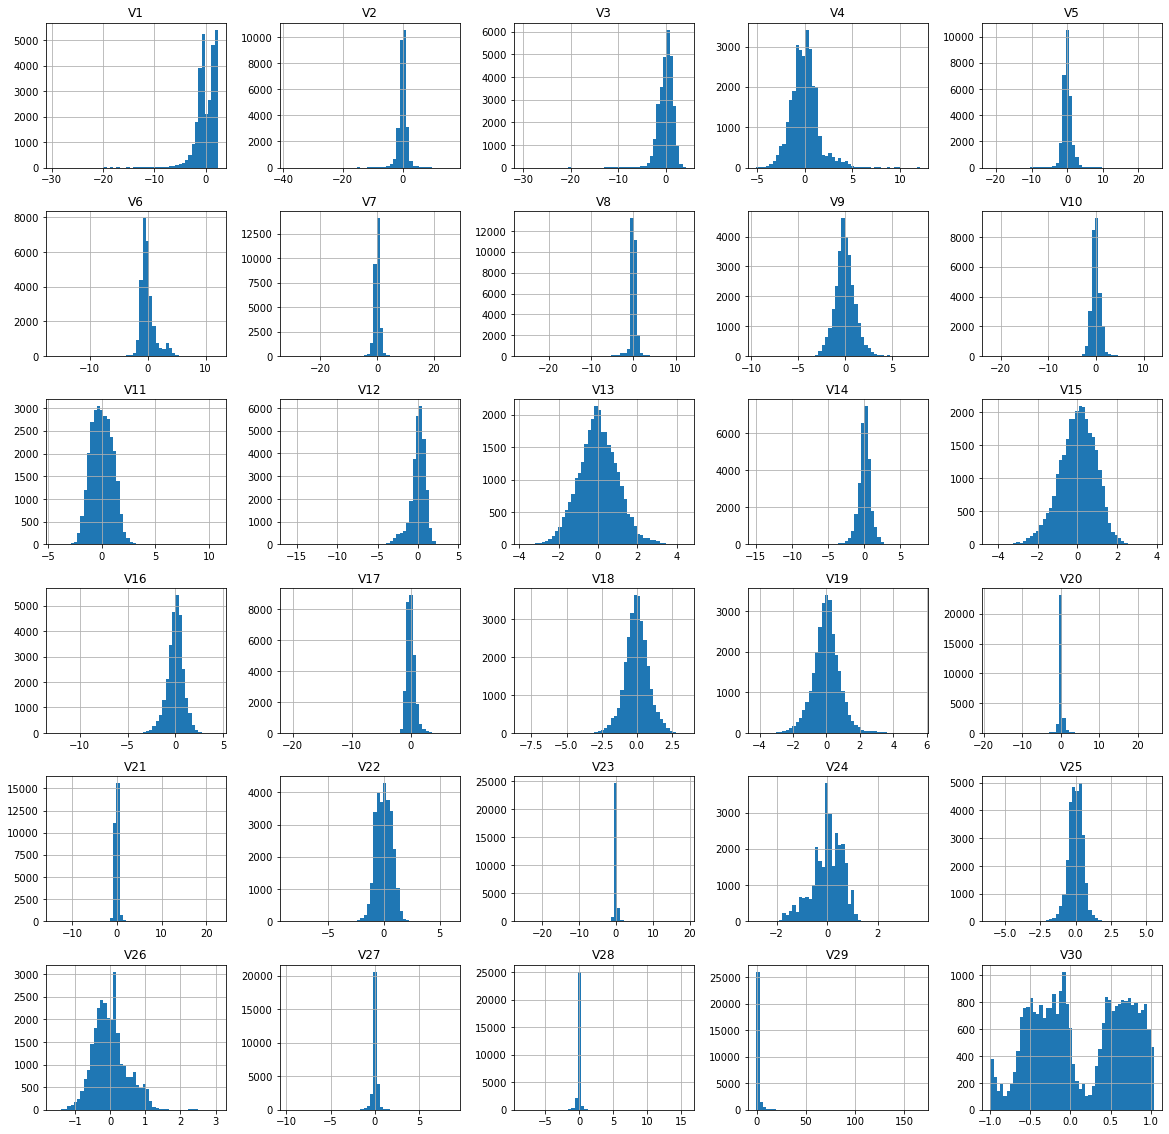

In [16]:
val_re.hist(bins = 50, figsize = (20,20))
plt.show()

In [44]:
val_fraud.loc[71]["V1"]

-3.0435406239976

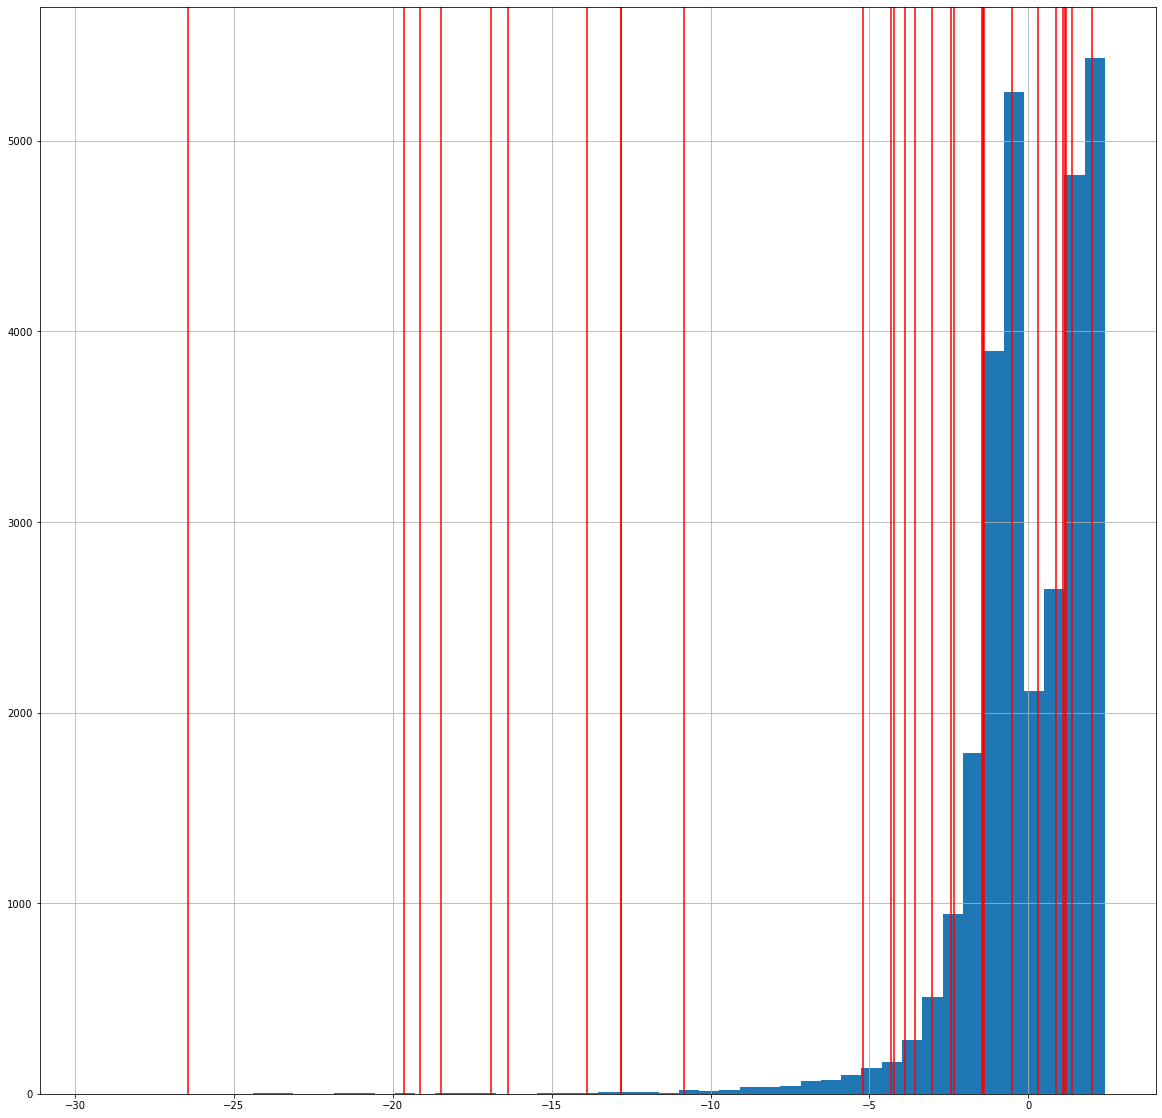

In [46]:
val_re["V1"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V1"],color="red")
plt.axvline(val_fraud.loc[641]["V1"],color="red")
plt.axvline(val_fraud.loc[677]["V1"],color="red")
plt.axvline(val_fraud.loc[836]["V1"],color="red")
plt.axvline(val_fraud.loc[1196]["V1"],color="red")
plt.axvline(val_fraud.loc[1201]["V1"],color="red")
plt.axvline(val_fraud.loc[1547]["V1"],color="red")
plt.axvline(val_fraud.loc[3055]["V1"],color="red")
plt.axvline(val_fraud.loc[4039]["V1"],color="red")
plt.axvline(val_fraud.loc[4267]["V1"],color="red")
plt.axvline(val_fraud.loc[4396]["V1"],color="red")
plt.axvline(val_fraud.loc[7702]["V1"],color="red")
plt.axvline(val_fraud.loc[9326]["V1"],color="red")
plt.axvline(val_fraud.loc[12377]["V1"],color="red")
plt.axvline(val_fraud.loc[12797]["V1"],color="red")
plt.axvline(val_fraud.loc[13706]["V1"],color="red")
plt.axvline(val_fraud.loc[14221]["V1"],color="red")
plt.axvline(val_fraud.loc[15027]["V1"],color="red")
plt.axvline(val_fraud.loc[15029]["V1"],color="red")
plt.axvline(val_fraud.loc[15030]["V1"],color="red")
plt.axvline(val_fraud.loc[15054]["V1"],color="red")
plt.axvline(val_fraud.loc[15345]["V1"],color="red")
plt.axvline(val_fraud.loc[15425]["V1"],color="red")
plt.axvline(val_fraud.loc[24110]["V1"],color="red")
plt.axvline(val_fraud.loc[24358]["V1"],color="red")
plt.axvline(val_fraud.loc[24742]["V1"],color="red")
plt.axvline(val_fraud.loc[25042]["V1"],color="red")
plt.axvline(val_fraud.loc[25504]["V1"],color="red")
plt.axvline(val_fraud.loc[27998]["V1"],color="red")
plt.axvline(val_fraud.loc[28146]["V1"],color="red")
plt.show()

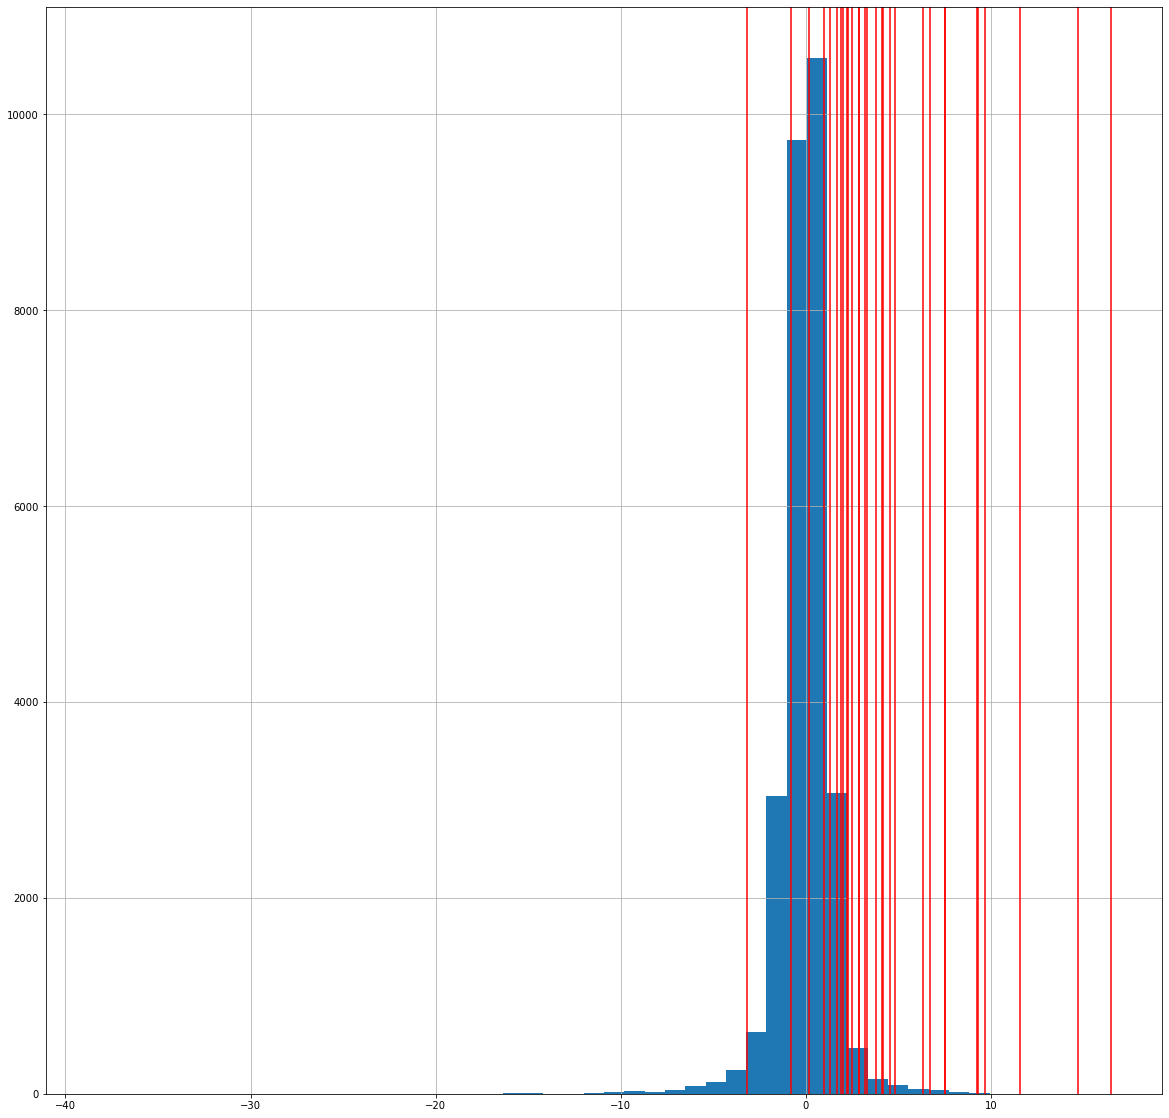

In [47]:
val_re["V2"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V2"],color="red")
plt.axvline(val_fraud.loc[641]["V2"],color="red")
plt.axvline(val_fraud.loc[677]["V2"],color="red")
plt.axvline(val_fraud.loc[836]["V2"],color="red")
plt.axvline(val_fraud.loc[1196]["V2"],color="red")
plt.axvline(val_fraud.loc[1201]["V2"],color="red")
plt.axvline(val_fraud.loc[1547]["V2"],color="red")
plt.axvline(val_fraud.loc[3055]["V2"],color="red")
plt.axvline(val_fraud.loc[4039]["V2"],color="red")
plt.axvline(val_fraud.loc[4267]["V2"],color="red")
plt.axvline(val_fraud.loc[4396]["V2"],color="red")
plt.axvline(val_fraud.loc[7702]["V2"],color="red")
plt.axvline(val_fraud.loc[9326]["V2"],color="red")
plt.axvline(val_fraud.loc[12377]["V2"],color="red")
plt.axvline(val_fraud.loc[12797]["V2"],color="red")
plt.axvline(val_fraud.loc[13706]["V2"],color="red")
plt.axvline(val_fraud.loc[14221]["V2"],color="red")
plt.axvline(val_fraud.loc[15027]["V2"],color="red")
plt.axvline(val_fraud.loc[15029]["V2"],color="red")
plt.axvline(val_fraud.loc[15030]["V2"],color="red")
plt.axvline(val_fraud.loc[15054]["V2"],color="red")
plt.axvline(val_fraud.loc[15345]["V2"],color="red")
plt.axvline(val_fraud.loc[15425]["V2"],color="red")
plt.axvline(val_fraud.loc[24110]["V2"],color="red")
plt.axvline(val_fraud.loc[24358]["V2"],color="red")
plt.axvline(val_fraud.loc[24742]["V2"],color="red")
plt.axvline(val_fraud.loc[25042]["V2"],color="red")
plt.axvline(val_fraud.loc[25504]["V2"],color="red")
plt.axvline(val_fraud.loc[27998]["V2"],color="red")
plt.axvline(val_fraud.loc[28146]["V2"],color="red")
plt.show()

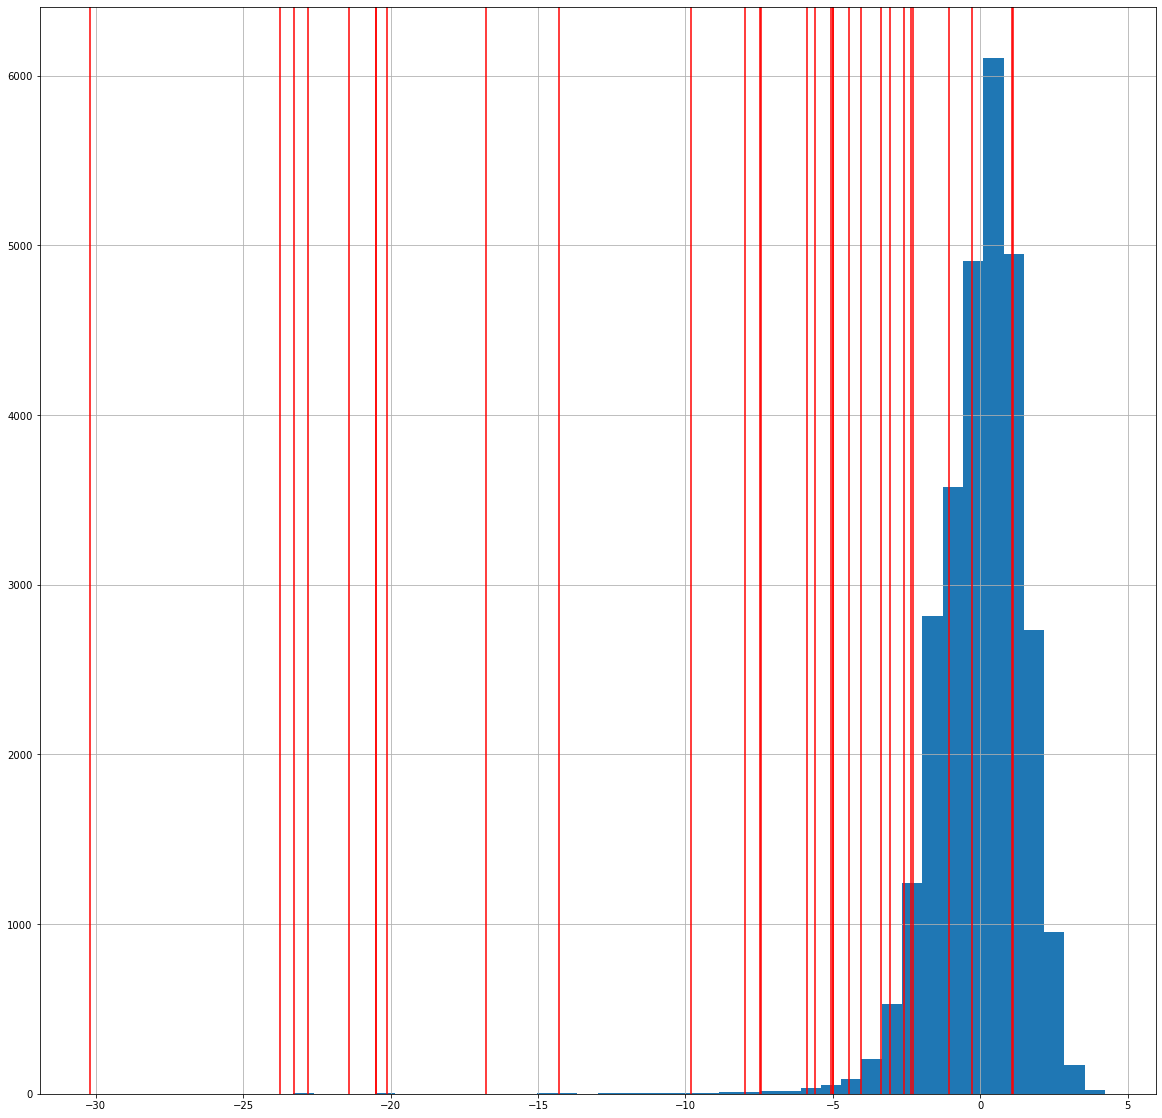

In [48]:
val_re["V3"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V3"],color="red")
plt.axvline(val_fraud.loc[641]["V3"],color="red")
plt.axvline(val_fraud.loc[677]["V3"],color="red")
plt.axvline(val_fraud.loc[836]["V3"],color="red")
plt.axvline(val_fraud.loc[1196]["V3"],color="red")
plt.axvline(val_fraud.loc[1201]["V3"],color="red")
plt.axvline(val_fraud.loc[1547]["V3"],color="red")
plt.axvline(val_fraud.loc[3055]["V3"],color="red")
plt.axvline(val_fraud.loc[4039]["V3"],color="red")
plt.axvline(val_fraud.loc[4267]["V3"],color="red")
plt.axvline(val_fraud.loc[4396]["V3"],color="red")
plt.axvline(val_fraud.loc[7702]["V3"],color="red")
plt.axvline(val_fraud.loc[9326]["V3"],color="red")
plt.axvline(val_fraud.loc[12377]["V3"],color="red")
plt.axvline(val_fraud.loc[12797]["V3"],color="red")
plt.axvline(val_fraud.loc[13706]["V3"],color="red")
plt.axvline(val_fraud.loc[14221]["V3"],color="red")
plt.axvline(val_fraud.loc[15027]["V3"],color="red")
plt.axvline(val_fraud.loc[15029]["V3"],color="red")
plt.axvline(val_fraud.loc[15030]["V3"],color="red")
plt.axvline(val_fraud.loc[15054]["V3"],color="red")
plt.axvline(val_fraud.loc[15345]["V3"],color="red")
plt.axvline(val_fraud.loc[15425]["V3"],color="red")
plt.axvline(val_fraud.loc[24110]["V3"],color="red")
plt.axvline(val_fraud.loc[24358]["V3"],color="red")
plt.axvline(val_fraud.loc[24742]["V3"],color="red")
plt.axvline(val_fraud.loc[25042]["V3"],color="red")
plt.axvline(val_fraud.loc[25504]["V3"],color="red")
plt.axvline(val_fraud.loc[27998]["V3"],color="red")
plt.axvline(val_fraud.loc[28146]["V3"],color="red")
plt.show()

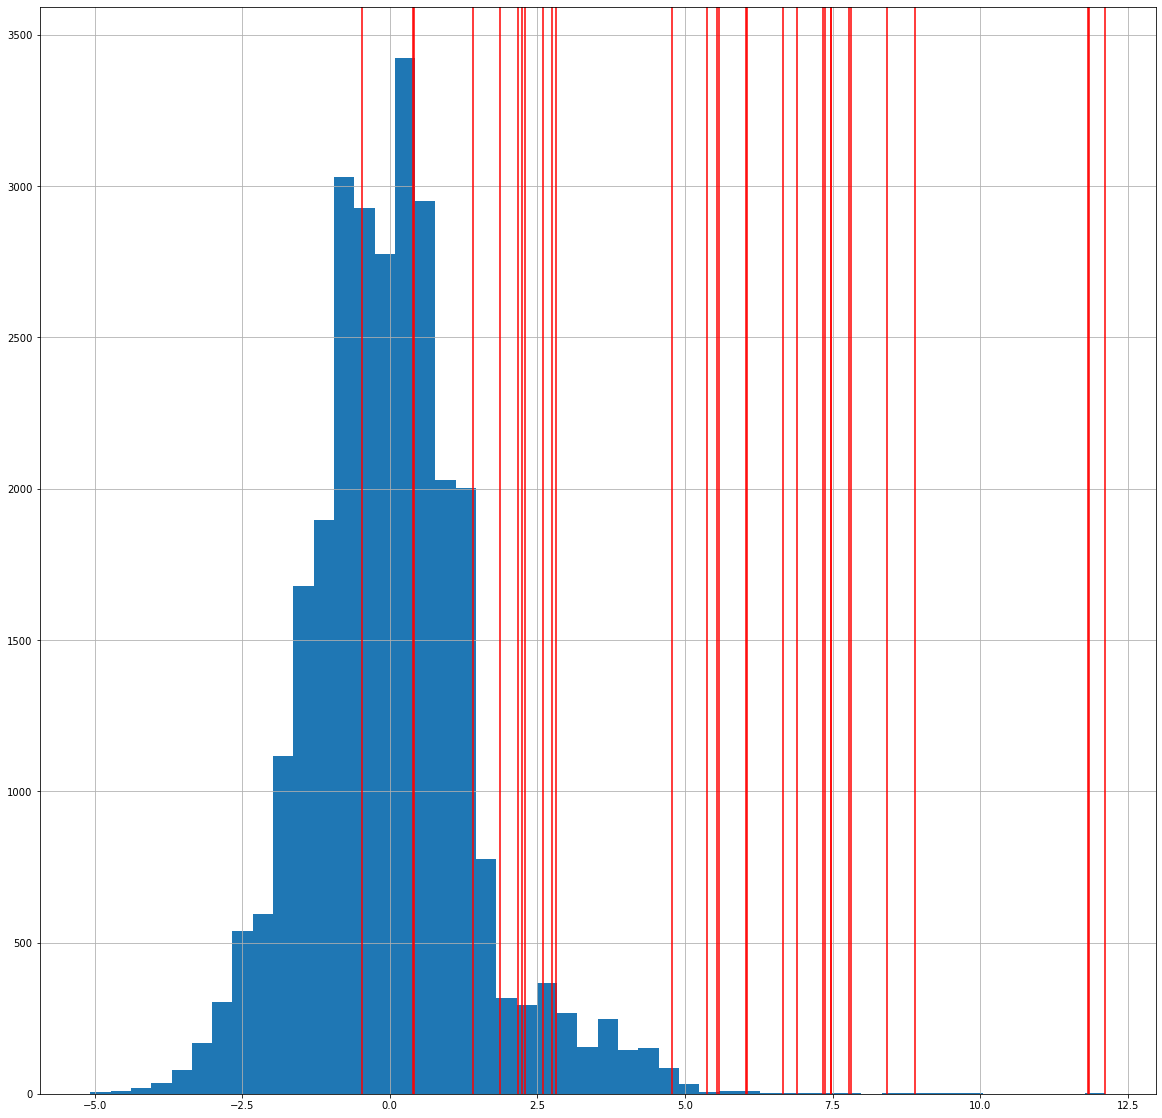

In [49]:
val_re["V4"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V4"],color="red")
plt.axvline(val_fraud.loc[641]["V4"],color="red")
plt.axvline(val_fraud.loc[677]["V4"],color="red")
plt.axvline(val_fraud.loc[836]["V4"],color="red")
plt.axvline(val_fraud.loc[1196]["V4"],color="red")
plt.axvline(val_fraud.loc[1201]["V4"],color="red")
plt.axvline(val_fraud.loc[1547]["V4"],color="red")
plt.axvline(val_fraud.loc[3055]["V4"],color="red")
plt.axvline(val_fraud.loc[4039]["V4"],color="red")
plt.axvline(val_fraud.loc[4267]["V4"],color="red")
plt.axvline(val_fraud.loc[4396]["V4"],color="red")
plt.axvline(val_fraud.loc[7702]["V4"],color="red")
plt.axvline(val_fraud.loc[9326]["V4"],color="red")
plt.axvline(val_fraud.loc[12377]["V4"],color="red")
plt.axvline(val_fraud.loc[12797]["V4"],color="red")
plt.axvline(val_fraud.loc[13706]["V4"],color="red")
plt.axvline(val_fraud.loc[14221]["V4"],color="red")
plt.axvline(val_fraud.loc[15027]["V4"],color="red")
plt.axvline(val_fraud.loc[15029]["V4"],color="red")
plt.axvline(val_fraud.loc[15030]["V4"],color="red")
plt.axvline(val_fraud.loc[15054]["V4"],color="red")
plt.axvline(val_fraud.loc[15345]["V4"],color="red")
plt.axvline(val_fraud.loc[15425]["V4"],color="red")
plt.axvline(val_fraud.loc[24110]["V4"],color="red")
plt.axvline(val_fraud.loc[24358]["V4"],color="red")
plt.axvline(val_fraud.loc[24742]["V4"],color="red")
plt.axvline(val_fraud.loc[25042]["V4"],color="red")
plt.axvline(val_fraud.loc[25504]["V4"],color="red")
plt.axvline(val_fraud.loc[27998]["V4"],color="red")
plt.axvline(val_fraud.loc[28146]["V4"],color="red")
plt.show()

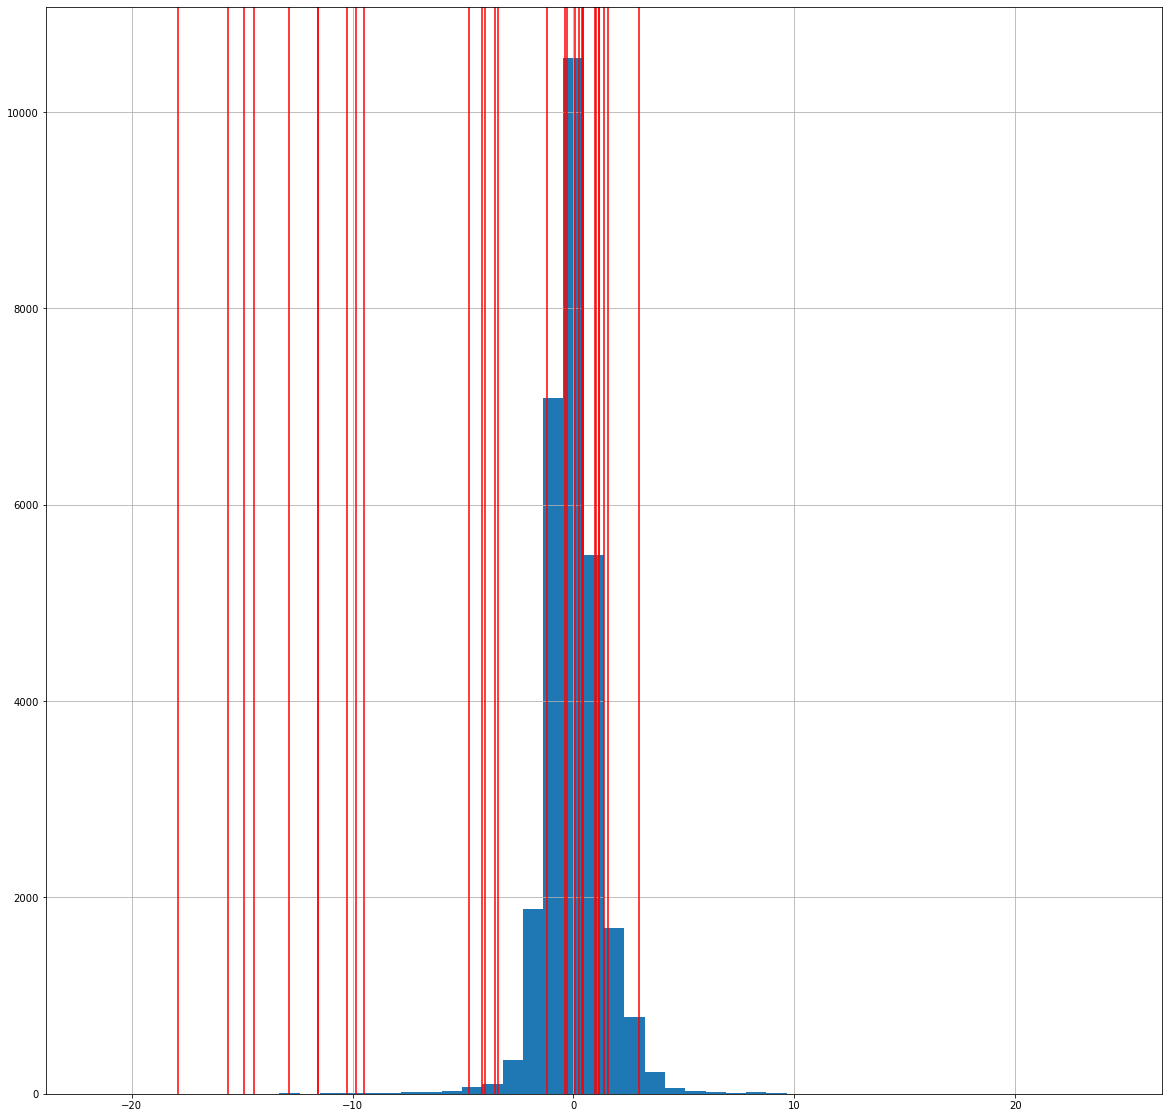

In [50]:
val_re["V5"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V5"],color="red")
plt.axvline(val_fraud.loc[641]["V5"],color="red")
plt.axvline(val_fraud.loc[677]["V5"],color="red")
plt.axvline(val_fraud.loc[836]["V5"],color="red")
plt.axvline(val_fraud.loc[1196]["V5"],color="red")
plt.axvline(val_fraud.loc[1201]["V5"],color="red")
plt.axvline(val_fraud.loc[1547]["V5"],color="red")
plt.axvline(val_fraud.loc[3055]["V5"],color="red")
plt.axvline(val_fraud.loc[4039]["V5"],color="red")
plt.axvline(val_fraud.loc[4267]["V5"],color="red")
plt.axvline(val_fraud.loc[4396]["V5"],color="red")
plt.axvline(val_fraud.loc[7702]["V5"],color="red")
plt.axvline(val_fraud.loc[9326]["V5"],color="red")
plt.axvline(val_fraud.loc[12377]["V5"],color="red")
plt.axvline(val_fraud.loc[12797]["V5"],color="red")
plt.axvline(val_fraud.loc[13706]["V5"],color="red")
plt.axvline(val_fraud.loc[14221]["V5"],color="red")
plt.axvline(val_fraud.loc[15027]["V5"],color="red")
plt.axvline(val_fraud.loc[15029]["V5"],color="red")
plt.axvline(val_fraud.loc[15030]["V5"],color="red")
plt.axvline(val_fraud.loc[15054]["V5"],color="red")
plt.axvline(val_fraud.loc[15345]["V5"],color="red")
plt.axvline(val_fraud.loc[15425]["V5"],color="red")
plt.axvline(val_fraud.loc[24110]["V5"],color="red")
plt.axvline(val_fraud.loc[24358]["V5"],color="red")
plt.axvline(val_fraud.loc[24742]["V5"],color="red")
plt.axvline(val_fraud.loc[25042]["V5"],color="red")
plt.axvline(val_fraud.loc[25504]["V5"],color="red")
plt.axvline(val_fraud.loc[27998]["V5"],color="red")
plt.axvline(val_fraud.loc[28146]["V5"],color="red")
plt.show()

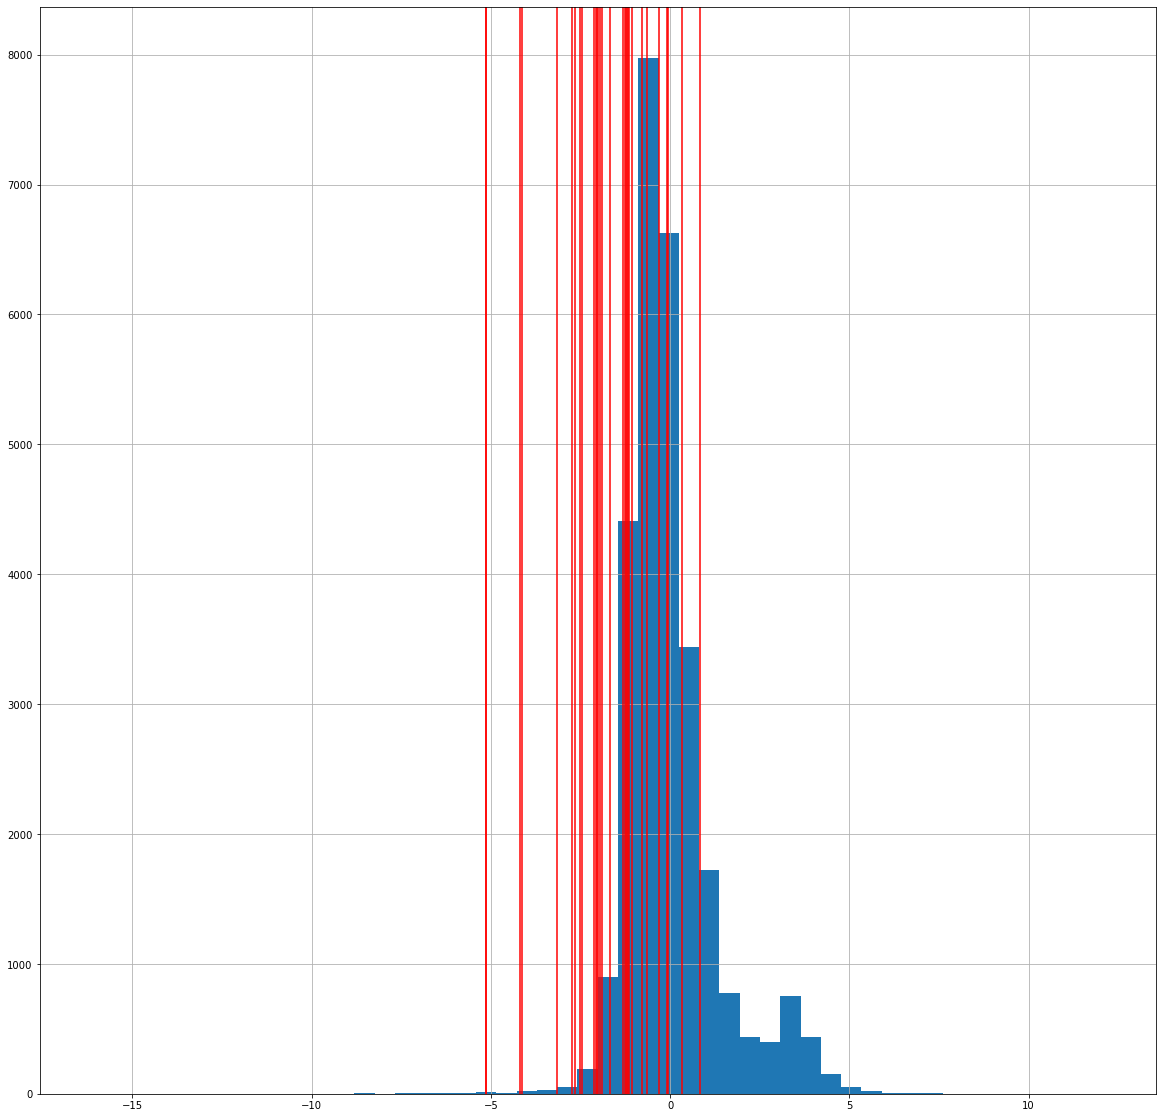

In [51]:
val_re["V6"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V6"],color="red")
plt.axvline(val_fraud.loc[641]["V6"],color="red")
plt.axvline(val_fraud.loc[677]["V6"],color="red")
plt.axvline(val_fraud.loc[836]["V6"],color="red")
plt.axvline(val_fraud.loc[1196]["V6"],color="red")
plt.axvline(val_fraud.loc[1201]["V6"],color="red")
plt.axvline(val_fraud.loc[1547]["V6"],color="red")
plt.axvline(val_fraud.loc[3055]["V6"],color="red")
plt.axvline(val_fraud.loc[4039]["V6"],color="red")
plt.axvline(val_fraud.loc[4267]["V6"],color="red")
plt.axvline(val_fraud.loc[4396]["V6"],color="red")
plt.axvline(val_fraud.loc[7702]["V6"],color="red")
plt.axvline(val_fraud.loc[9326]["V6"],color="red")
plt.axvline(val_fraud.loc[12377]["V6"],color="red")
plt.axvline(val_fraud.loc[12797]["V6"],color="red")
plt.axvline(val_fraud.loc[13706]["V6"],color="red")
plt.axvline(val_fraud.loc[14221]["V6"],color="red")
plt.axvline(val_fraud.loc[15027]["V6"],color="red")
plt.axvline(val_fraud.loc[15029]["V6"],color="red")
plt.axvline(val_fraud.loc[15030]["V6"],color="red")
plt.axvline(val_fraud.loc[15054]["V6"],color="red")
plt.axvline(val_fraud.loc[15345]["V6"],color="red")
plt.axvline(val_fraud.loc[15425]["V6"],color="red")
plt.axvline(val_fraud.loc[24110]["V6"],color="red")
plt.axvline(val_fraud.loc[24358]["V6"],color="red")
plt.axvline(val_fraud.loc[24742]["V6"],color="red")
plt.axvline(val_fraud.loc[25042]["V6"],color="red")
plt.axvline(val_fraud.loc[25504]["V6"],color="red")
plt.axvline(val_fraud.loc[27998]["V6"],color="red")
plt.axvline(val_fraud.loc[28146]["V6"],color="red")
plt.show()

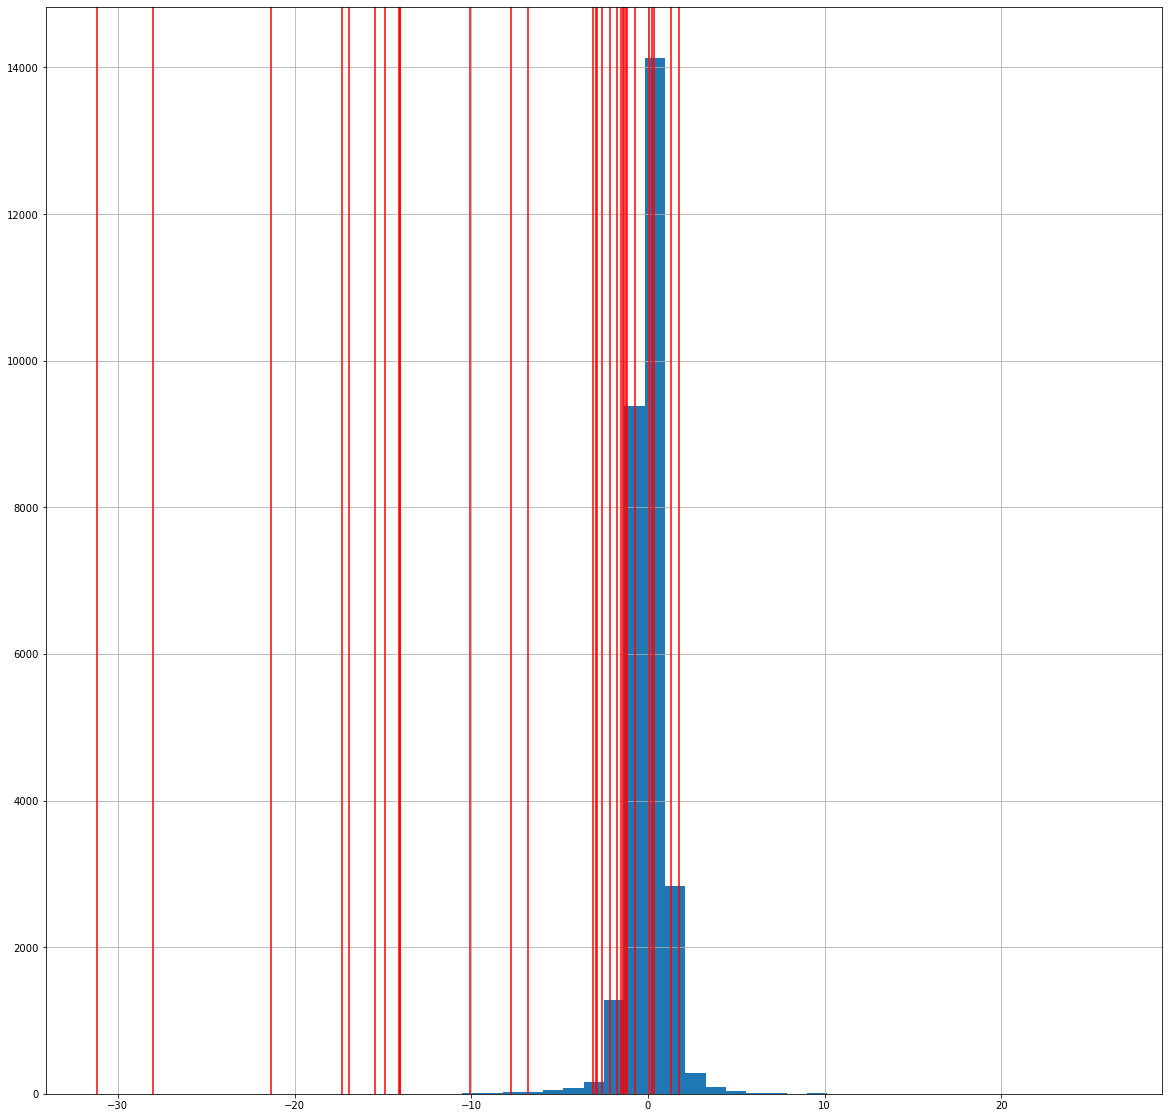

In [52]:
val_re["V7"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V7"],color="red")
plt.axvline(val_fraud.loc[641]["V7"],color="red")
plt.axvline(val_fraud.loc[677]["V7"],color="red")
plt.axvline(val_fraud.loc[836]["V7"],color="red")
plt.axvline(val_fraud.loc[1196]["V7"],color="red")
plt.axvline(val_fraud.loc[1201]["V7"],color="red")
plt.axvline(val_fraud.loc[1547]["V7"],color="red")
plt.axvline(val_fraud.loc[3055]["V7"],color="red")
plt.axvline(val_fraud.loc[4039]["V7"],color="red")
plt.axvline(val_fraud.loc[4267]["V7"],color="red")
plt.axvline(val_fraud.loc[4396]["V7"],color="red")
plt.axvline(val_fraud.loc[7702]["V7"],color="red")
plt.axvline(val_fraud.loc[9326]["V7"],color="red")
plt.axvline(val_fraud.loc[12377]["V7"],color="red")
plt.axvline(val_fraud.loc[12797]["V7"],color="red")
plt.axvline(val_fraud.loc[13706]["V7"],color="red")
plt.axvline(val_fraud.loc[14221]["V7"],color="red")
plt.axvline(val_fraud.loc[15027]["V7"],color="red")
plt.axvline(val_fraud.loc[15029]["V7"],color="red")
plt.axvline(val_fraud.loc[15030]["V7"],color="red")
plt.axvline(val_fraud.loc[15054]["V7"],color="red")
plt.axvline(val_fraud.loc[15345]["V7"],color="red")
plt.axvline(val_fraud.loc[15425]["V7"],color="red")
plt.axvline(val_fraud.loc[24110]["V7"],color="red")
plt.axvline(val_fraud.loc[24358]["V7"],color="red")
plt.axvline(val_fraud.loc[24742]["V7"],color="red")
plt.axvline(val_fraud.loc[25042]["V7"],color="red")
plt.axvline(val_fraud.loc[25504]["V7"],color="red")
plt.axvline(val_fraud.loc[27998]["V7"],color="red")
plt.axvline(val_fraud.loc[28146]["V7"],color="red")
plt.show()

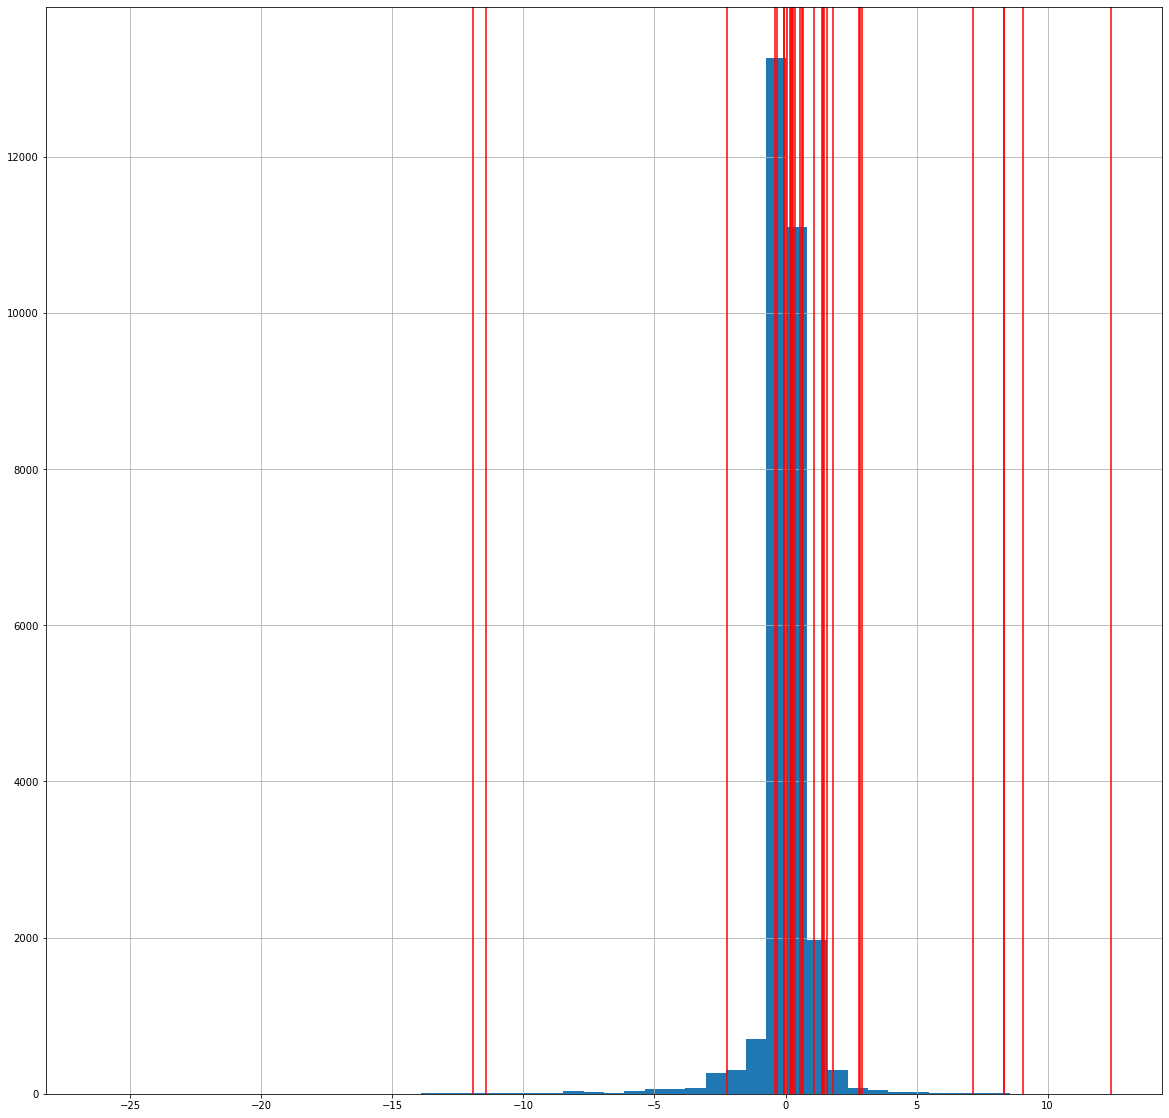

In [53]:
val_re["V8"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V8"],color="red")
plt.axvline(val_fraud.loc[641]["V8"],color="red")
plt.axvline(val_fraud.loc[677]["V8"],color="red")
plt.axvline(val_fraud.loc[836]["V8"],color="red")
plt.axvline(val_fraud.loc[1196]["V8"],color="red")
plt.axvline(val_fraud.loc[1201]["V8"],color="red")
plt.axvline(val_fraud.loc[1547]["V8"],color="red")
plt.axvline(val_fraud.loc[3055]["V8"],color="red")
plt.axvline(val_fraud.loc[4039]["V8"],color="red")
plt.axvline(val_fraud.loc[4267]["V8"],color="red")
plt.axvline(val_fraud.loc[4396]["V8"],color="red")
plt.axvline(val_fraud.loc[7702]["V8"],color="red")
plt.axvline(val_fraud.loc[9326]["V8"],color="red")
plt.axvline(val_fraud.loc[12377]["V8"],color="red")
plt.axvline(val_fraud.loc[12797]["V8"],color="red")
plt.axvline(val_fraud.loc[13706]["V8"],color="red")
plt.axvline(val_fraud.loc[14221]["V8"],color="red")
plt.axvline(val_fraud.loc[15027]["V8"],color="red")
plt.axvline(val_fraud.loc[15029]["V8"],color="red")
plt.axvline(val_fraud.loc[15030]["V8"],color="red")
plt.axvline(val_fraud.loc[15054]["V8"],color="red")
plt.axvline(val_fraud.loc[15345]["V8"],color="red")
plt.axvline(val_fraud.loc[15425]["V8"],color="red")
plt.axvline(val_fraud.loc[24110]["V8"],color="red")
plt.axvline(val_fraud.loc[24358]["V8"],color="red")
plt.axvline(val_fraud.loc[24742]["V8"],color="red")
plt.axvline(val_fraud.loc[25042]["V8"],color="red")
plt.axvline(val_fraud.loc[25504]["V8"],color="red")
plt.axvline(val_fraud.loc[27998]["V8"],color="red")
plt.axvline(val_fraud.loc[28146]["V8"],color="red")
plt.show()

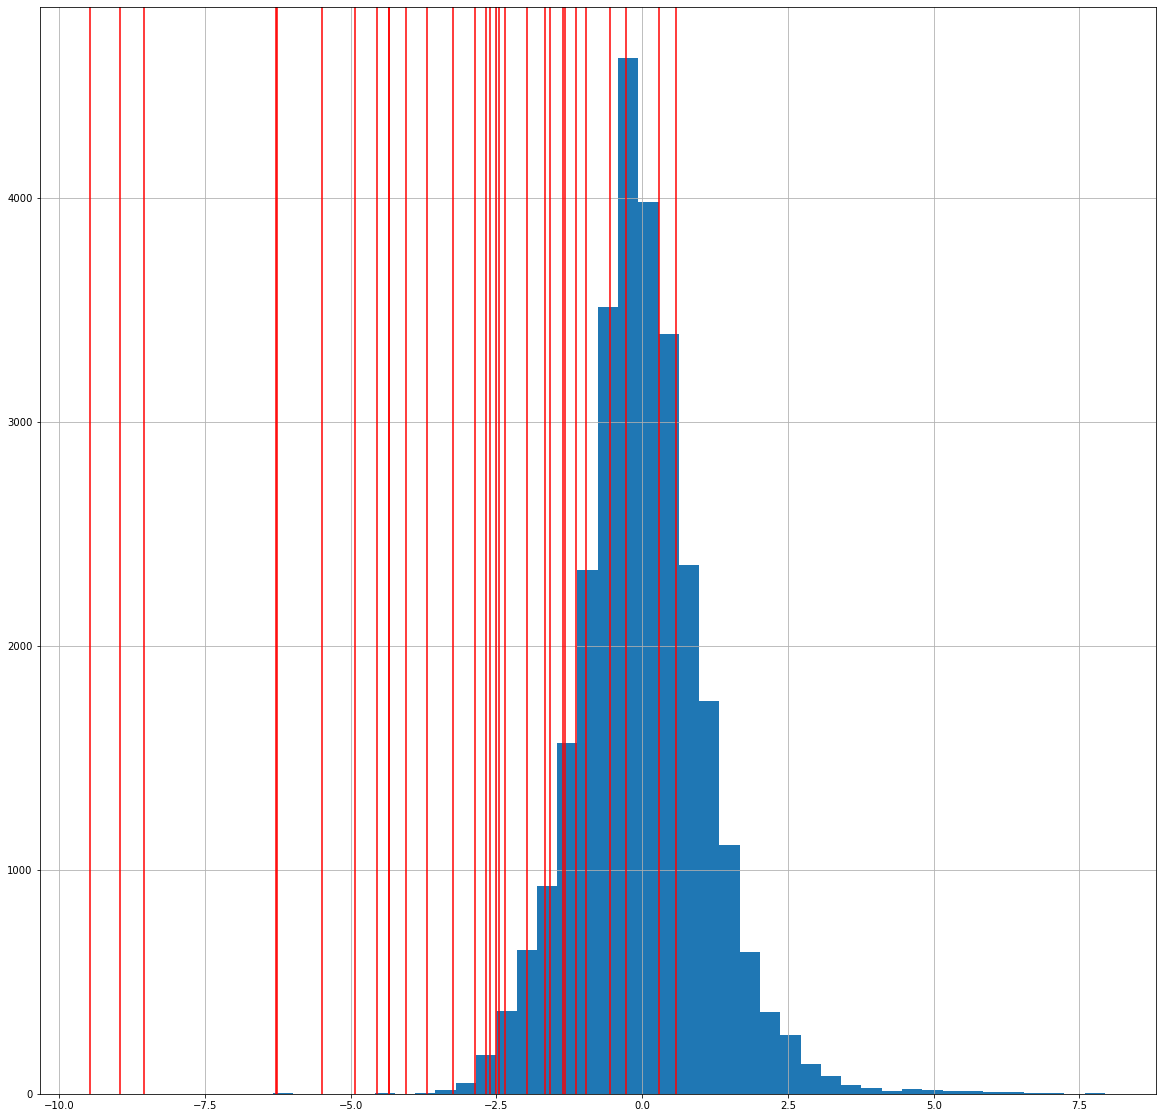

In [54]:
val_re["V9"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V9"],color="red")
plt.axvline(val_fraud.loc[641]["V9"],color="red")
plt.axvline(val_fraud.loc[677]["V9"],color="red")
plt.axvline(val_fraud.loc[836]["V9"],color="red")
plt.axvline(val_fraud.loc[1196]["V9"],color="red")
plt.axvline(val_fraud.loc[1201]["V9"],color="red")
plt.axvline(val_fraud.loc[1547]["V9"],color="red")
plt.axvline(val_fraud.loc[3055]["V9"],color="red")
plt.axvline(val_fraud.loc[4039]["V9"],color="red")
plt.axvline(val_fraud.loc[4267]["V9"],color="red")
plt.axvline(val_fraud.loc[4396]["V9"],color="red")
plt.axvline(val_fraud.loc[7702]["V9"],color="red")
plt.axvline(val_fraud.loc[9326]["V9"],color="red")
plt.axvline(val_fraud.loc[12377]["V9"],color="red")
plt.axvline(val_fraud.loc[12797]["V9"],color="red")
plt.axvline(val_fraud.loc[13706]["V9"],color="red")
plt.axvline(val_fraud.loc[14221]["V9"],color="red")
plt.axvline(val_fraud.loc[15027]["V9"],color="red")
plt.axvline(val_fraud.loc[15029]["V9"],color="red")
plt.axvline(val_fraud.loc[15030]["V9"],color="red")
plt.axvline(val_fraud.loc[15054]["V9"],color="red")
plt.axvline(val_fraud.loc[15345]["V9"],color="red")
plt.axvline(val_fraud.loc[15425]["V9"],color="red")
plt.axvline(val_fraud.loc[24110]["V9"],color="red")
plt.axvline(val_fraud.loc[24358]["V9"],color="red")
plt.axvline(val_fraud.loc[24742]["V9"],color="red")
plt.axvline(val_fraud.loc[25042]["V9"],color="red")
plt.axvline(val_fraud.loc[25504]["V9"],color="red")
plt.axvline(val_fraud.loc[27998]["V9"],color="red")
plt.axvline(val_fraud.loc[28146]["V9"],color="red")
plt.show()

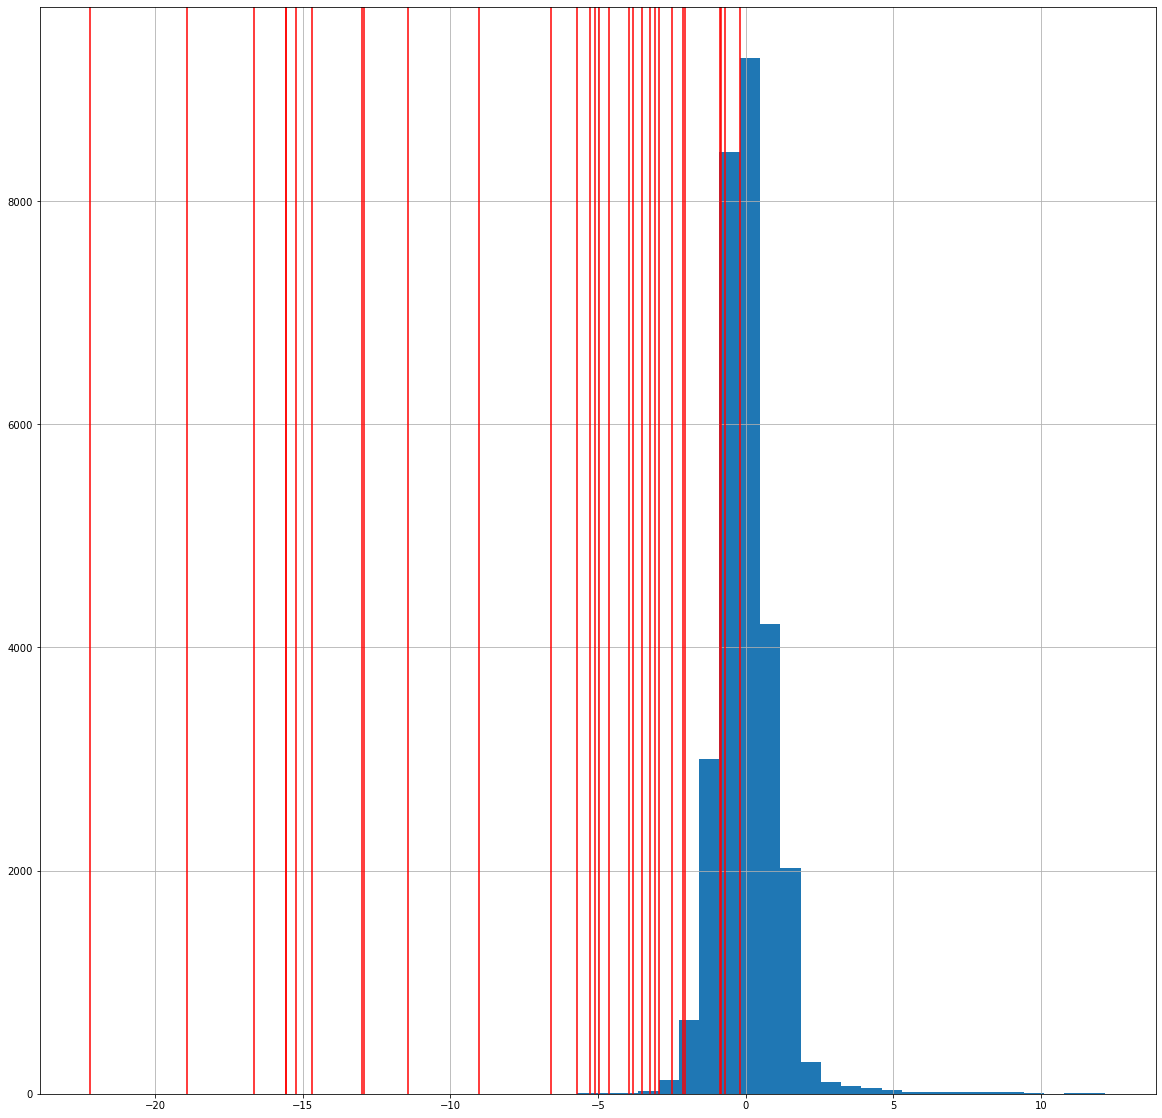

In [55]:
val_re["V10"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V10"],color="red")
plt.axvline(val_fraud.loc[641]["V10"],color="red")
plt.axvline(val_fraud.loc[677]["V10"],color="red")
plt.axvline(val_fraud.loc[836]["V10"],color="red")
plt.axvline(val_fraud.loc[1196]["V10"],color="red")
plt.axvline(val_fraud.loc[1201]["V10"],color="red")
plt.axvline(val_fraud.loc[1547]["V10"],color="red")
plt.axvline(val_fraud.loc[3055]["V10"],color="red")
plt.axvline(val_fraud.loc[4039]["V10"],color="red")
plt.axvline(val_fraud.loc[4267]["V10"],color="red")
plt.axvline(val_fraud.loc[4396]["V10"],color="red")
plt.axvline(val_fraud.loc[7702]["V10"],color="red")
plt.axvline(val_fraud.loc[9326]["V10"],color="red")
plt.axvline(val_fraud.loc[12377]["V10"],color="red")
plt.axvline(val_fraud.loc[12797]["V10"],color="red")
plt.axvline(val_fraud.loc[13706]["V10"],color="red")
plt.axvline(val_fraud.loc[14221]["V10"],color="red")
plt.axvline(val_fraud.loc[15027]["V10"],color="red")
plt.axvline(val_fraud.loc[15029]["V10"],color="red")
plt.axvline(val_fraud.loc[15030]["V10"],color="red")
plt.axvline(val_fraud.loc[15054]["V10"],color="red")
plt.axvline(val_fraud.loc[15345]["V10"],color="red")
plt.axvline(val_fraud.loc[15425]["V10"],color="red")
plt.axvline(val_fraud.loc[24110]["V10"],color="red")
plt.axvline(val_fraud.loc[24358]["V10"],color="red")
plt.axvline(val_fraud.loc[24742]["V10"],color="red")
plt.axvline(val_fraud.loc[25042]["V10"],color="red")
plt.axvline(val_fraud.loc[25504]["V10"],color="red")
plt.axvline(val_fraud.loc[27998]["V10"],color="red")
plt.axvline(val_fraud.loc[28146]["V10"],color="red")
plt.show()

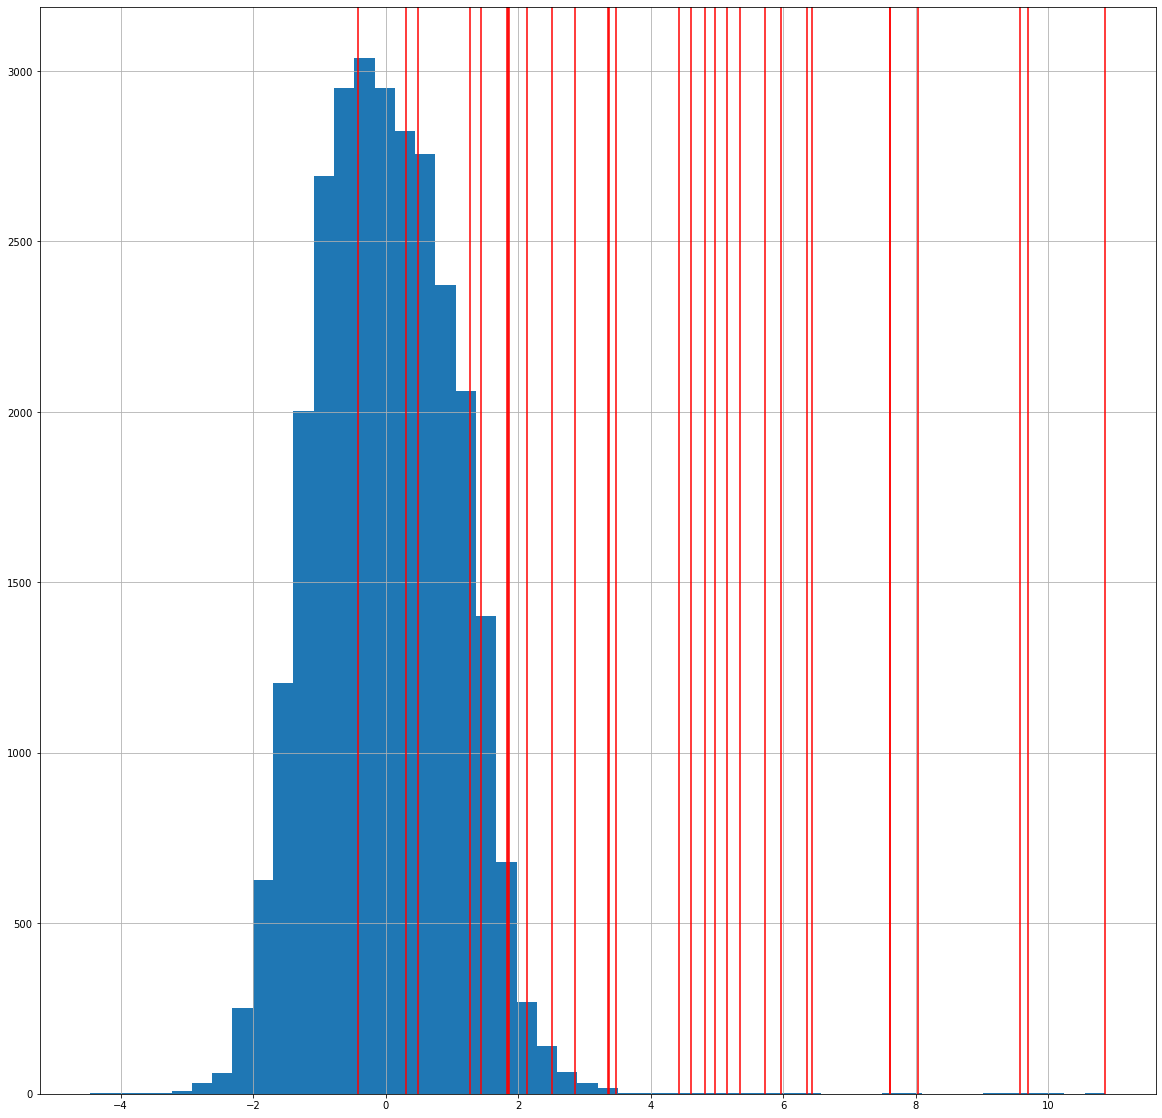

In [56]:
val_re["V11"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V11"],color="red")
plt.axvline(val_fraud.loc[641]["V11"],color="red")
plt.axvline(val_fraud.loc[677]["V11"],color="red")
plt.axvline(val_fraud.loc[836]["V11"],color="red")
plt.axvline(val_fraud.loc[1196]["V11"],color="red")
plt.axvline(val_fraud.loc[1201]["V11"],color="red")
plt.axvline(val_fraud.loc[1547]["V11"],color="red")
plt.axvline(val_fraud.loc[3055]["V11"],color="red")
plt.axvline(val_fraud.loc[4039]["V11"],color="red")
plt.axvline(val_fraud.loc[4267]["V11"],color="red")
plt.axvline(val_fraud.loc[4396]["V11"],color="red")
plt.axvline(val_fraud.loc[7702]["V11"],color="red")
plt.axvline(val_fraud.loc[9326]["V11"],color="red")
plt.axvline(val_fraud.loc[12377]["V11"],color="red")
plt.axvline(val_fraud.loc[12797]["V11"],color="red")
plt.axvline(val_fraud.loc[13706]["V11"],color="red")
plt.axvline(val_fraud.loc[14221]["V11"],color="red")
plt.axvline(val_fraud.loc[15027]["V11"],color="red")
plt.axvline(val_fraud.loc[15029]["V11"],color="red")
plt.axvline(val_fraud.loc[15030]["V11"],color="red")
plt.axvline(val_fraud.loc[15054]["V11"],color="red")
plt.axvline(val_fraud.loc[15345]["V11"],color="red")
plt.axvline(val_fraud.loc[15425]["V11"],color="red")
plt.axvline(val_fraud.loc[24110]["V11"],color="red")
plt.axvline(val_fraud.loc[24358]["V11"],color="red")
plt.axvline(val_fraud.loc[24742]["V11"],color="red")
plt.axvline(val_fraud.loc[25042]["V11"],color="red")
plt.axvline(val_fraud.loc[25504]["V11"],color="red")
plt.axvline(val_fraud.loc[27998]["V11"],color="red")
plt.axvline(val_fraud.loc[28146]["V11"],color="red")
plt.show()

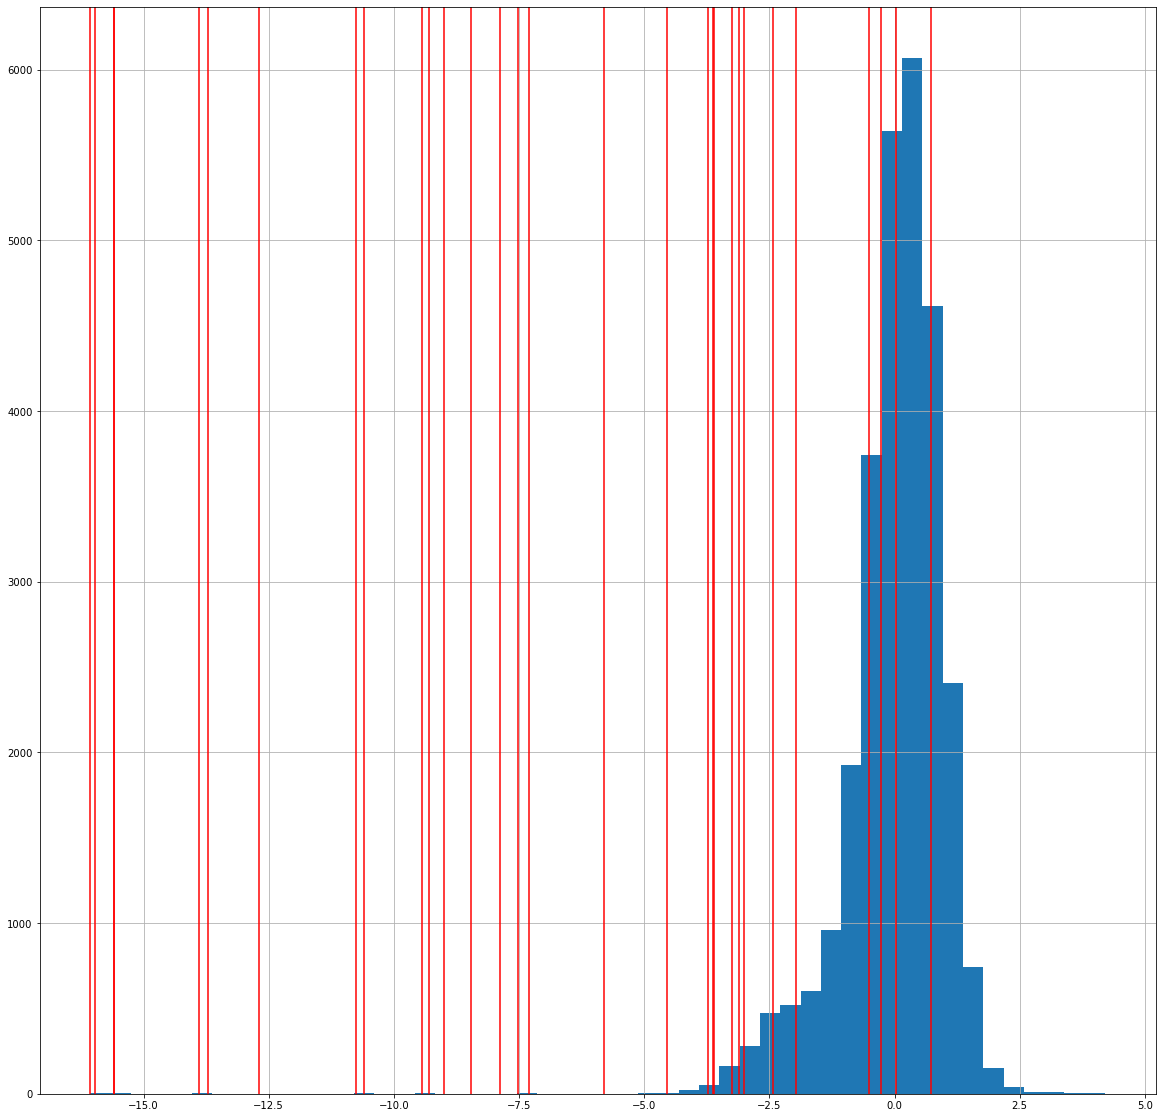

In [57]:
val_re["V12"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V12"],color="red")
plt.axvline(val_fraud.loc[641]["V12"],color="red")
plt.axvline(val_fraud.loc[677]["V12"],color="red")
plt.axvline(val_fraud.loc[836]["V12"],color="red")
plt.axvline(val_fraud.loc[1196]["V12"],color="red")
plt.axvline(val_fraud.loc[1201]["V12"],color="red")
plt.axvline(val_fraud.loc[1547]["V12"],color="red")
plt.axvline(val_fraud.loc[3055]["V12"],color="red")
plt.axvline(val_fraud.loc[4039]["V12"],color="red")
plt.axvline(val_fraud.loc[4267]["V12"],color="red")
plt.axvline(val_fraud.loc[4396]["V12"],color="red")
plt.axvline(val_fraud.loc[7702]["V12"],color="red")
plt.axvline(val_fraud.loc[9326]["V12"],color="red")
plt.axvline(val_fraud.loc[12377]["V12"],color="red")
plt.axvline(val_fraud.loc[12797]["V12"],color="red")
plt.axvline(val_fraud.loc[13706]["V12"],color="red")
plt.axvline(val_fraud.loc[14221]["V12"],color="red")
plt.axvline(val_fraud.loc[15027]["V12"],color="red")
plt.axvline(val_fraud.loc[15029]["V12"],color="red")
plt.axvline(val_fraud.loc[15030]["V12"],color="red")
plt.axvline(val_fraud.loc[15054]["V12"],color="red")
plt.axvline(val_fraud.loc[15345]["V12"],color="red")
plt.axvline(val_fraud.loc[15425]["V12"],color="red")
plt.axvline(val_fraud.loc[24110]["V12"],color="red")
plt.axvline(val_fraud.loc[24358]["V12"],color="red")
plt.axvline(val_fraud.loc[24742]["V12"],color="red")
plt.axvline(val_fraud.loc[25042]["V12"],color="red")
plt.axvline(val_fraud.loc[25504]["V12"],color="red")
plt.axvline(val_fraud.loc[27998]["V12"],color="red")
plt.axvline(val_fraud.loc[28146]["V12"],color="red")
plt.show()

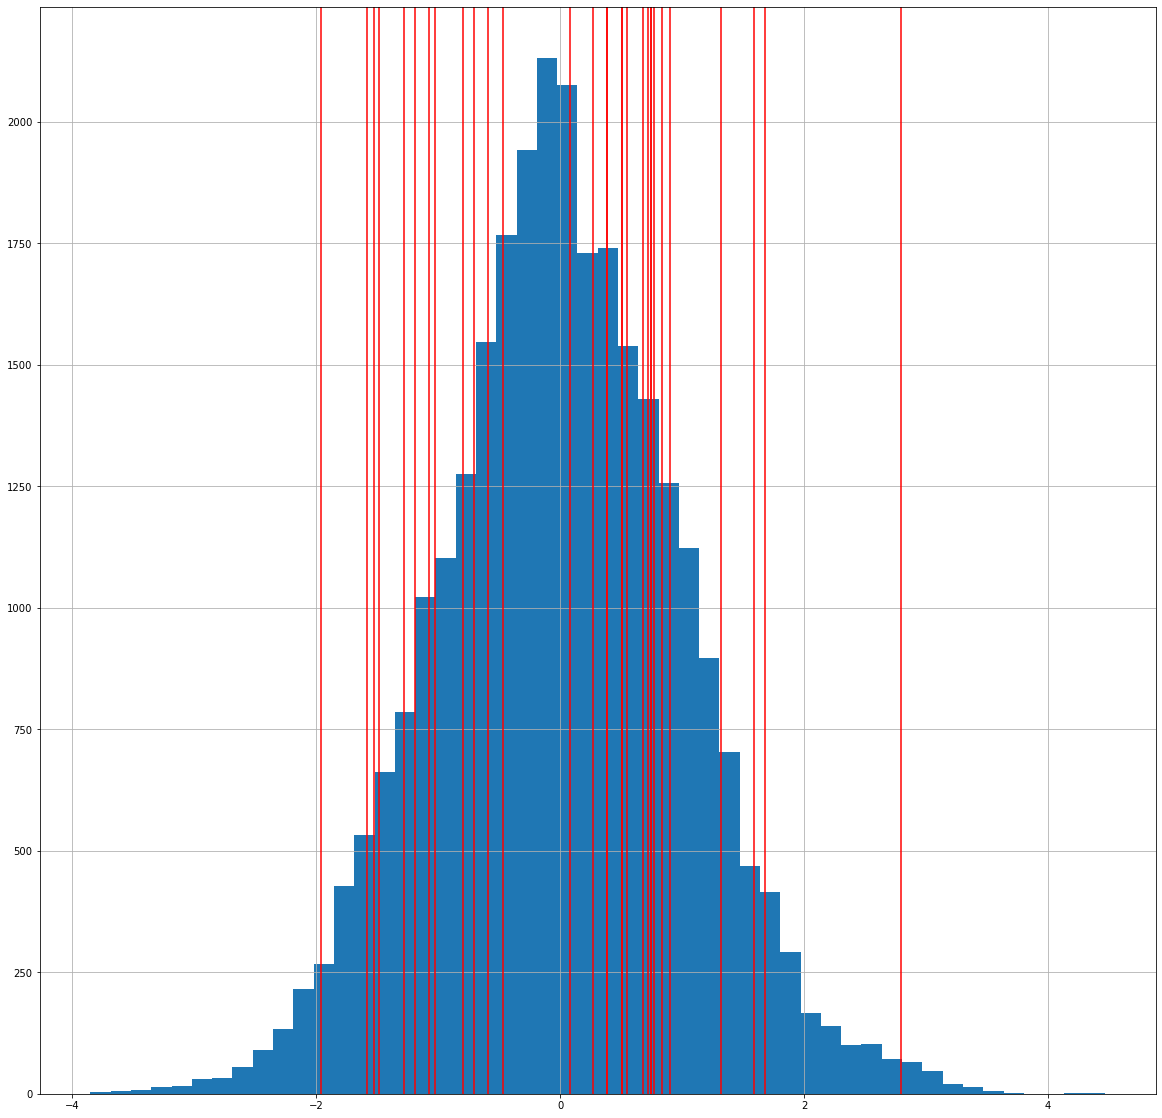

In [58]:
val_re["V13"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V13"],color="red")
plt.axvline(val_fraud.loc[641]["V13"],color="red")
plt.axvline(val_fraud.loc[677]["V13"],color="red")
plt.axvline(val_fraud.loc[836]["V13"],color="red")
plt.axvline(val_fraud.loc[1196]["V13"],color="red")
plt.axvline(val_fraud.loc[1201]["V13"],color="red")
plt.axvline(val_fraud.loc[1547]["V13"],color="red")
plt.axvline(val_fraud.loc[3055]["V13"],color="red")
plt.axvline(val_fraud.loc[4039]["V13"],color="red")
plt.axvline(val_fraud.loc[4267]["V13"],color="red")
plt.axvline(val_fraud.loc[4396]["V13"],color="red")
plt.axvline(val_fraud.loc[7702]["V13"],color="red")
plt.axvline(val_fraud.loc[9326]["V13"],color="red")
plt.axvline(val_fraud.loc[12377]["V13"],color="red")
plt.axvline(val_fraud.loc[12797]["V13"],color="red")
plt.axvline(val_fraud.loc[13706]["V13"],color="red")
plt.axvline(val_fraud.loc[14221]["V13"],color="red")
plt.axvline(val_fraud.loc[15027]["V13"],color="red")
plt.axvline(val_fraud.loc[15029]["V13"],color="red")
plt.axvline(val_fraud.loc[15030]["V13"],color="red")
plt.axvline(val_fraud.loc[15054]["V13"],color="red")
plt.axvline(val_fraud.loc[15345]["V13"],color="red")
plt.axvline(val_fraud.loc[15425]["V13"],color="red")
plt.axvline(val_fraud.loc[24110]["V13"],color="red")
plt.axvline(val_fraud.loc[24358]["V13"],color="red")
plt.axvline(val_fraud.loc[24742]["V13"],color="red")
plt.axvline(val_fraud.loc[25042]["V13"],color="red")
plt.axvline(val_fraud.loc[25504]["V13"],color="red")
plt.axvline(val_fraud.loc[27998]["V13"],color="red")
plt.axvline(val_fraud.loc[28146]["V13"],color="red")
plt.show()

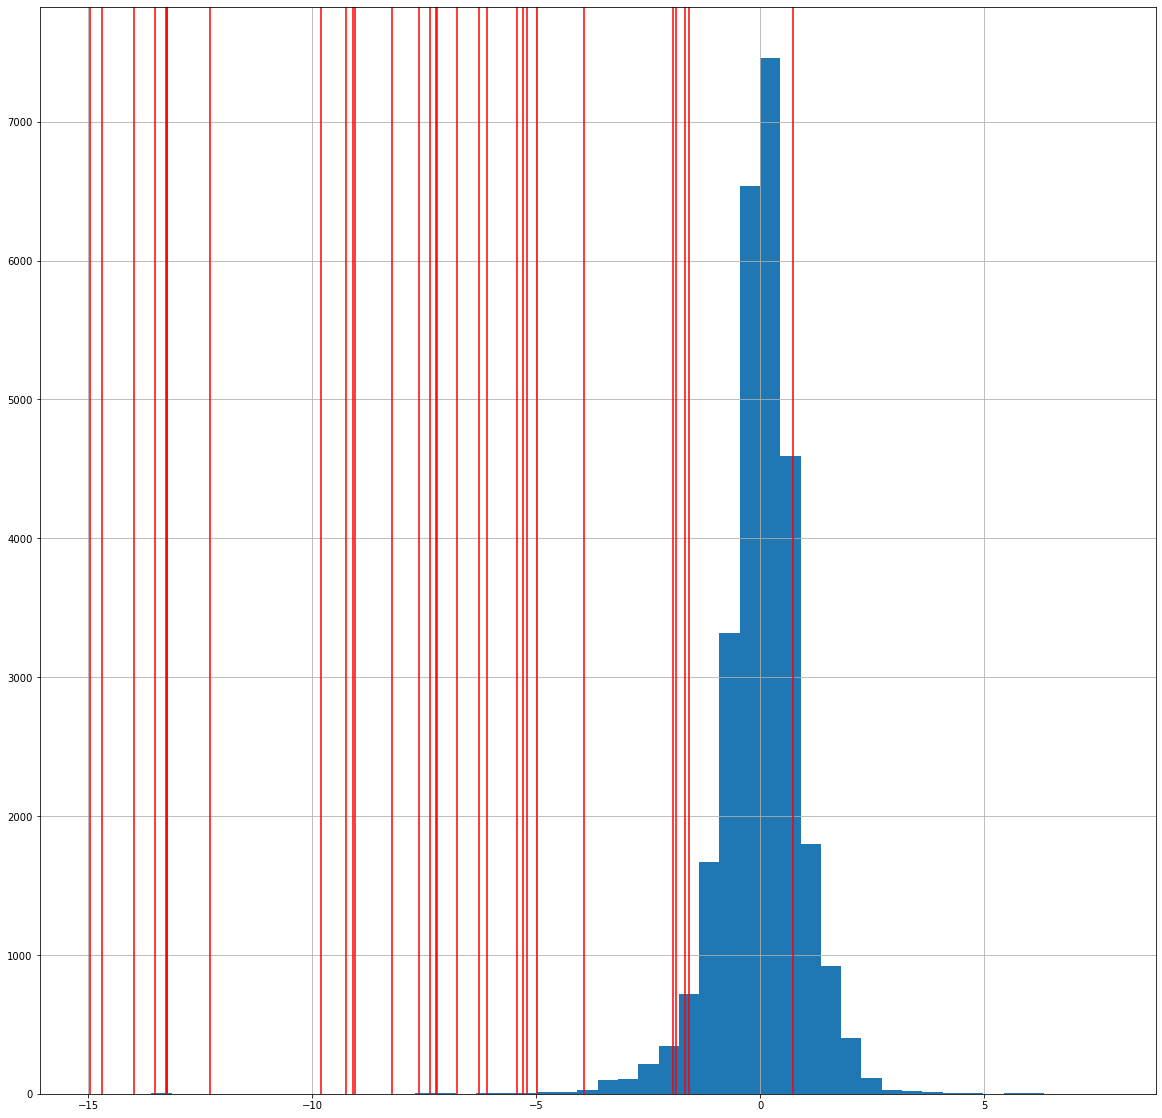

In [59]:
val_re["V14"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V14"],color="red")
plt.axvline(val_fraud.loc[641]["V14"],color="red")
plt.axvline(val_fraud.loc[677]["V14"],color="red")
plt.axvline(val_fraud.loc[836]["V14"],color="red")
plt.axvline(val_fraud.loc[1196]["V14"],color="red")
plt.axvline(val_fraud.loc[1201]["V14"],color="red")
plt.axvline(val_fraud.loc[1547]["V14"],color="red")
plt.axvline(val_fraud.loc[3055]["V14"],color="red")
plt.axvline(val_fraud.loc[4039]["V14"],color="red")
plt.axvline(val_fraud.loc[4267]["V14"],color="red")
plt.axvline(val_fraud.loc[4396]["V14"],color="red")
plt.axvline(val_fraud.loc[7702]["V14"],color="red")
plt.axvline(val_fraud.loc[9326]["V14"],color="red")
plt.axvline(val_fraud.loc[12377]["V14"],color="red")
plt.axvline(val_fraud.loc[12797]["V14"],color="red")
plt.axvline(val_fraud.loc[13706]["V14"],color="red")
plt.axvline(val_fraud.loc[14221]["V14"],color="red")
plt.axvline(val_fraud.loc[15027]["V14"],color="red")
plt.axvline(val_fraud.loc[15029]["V14"],color="red")
plt.axvline(val_fraud.loc[15030]["V14"],color="red")
plt.axvline(val_fraud.loc[15054]["V14"],color="red")
plt.axvline(val_fraud.loc[15345]["V14"],color="red")
plt.axvline(val_fraud.loc[15425]["V14"],color="red")
plt.axvline(val_fraud.loc[24110]["V14"],color="red")
plt.axvline(val_fraud.loc[24358]["V14"],color="red")
plt.axvline(val_fraud.loc[24742]["V14"],color="red")
plt.axvline(val_fraud.loc[25042]["V14"],color="red")
plt.axvline(val_fraud.loc[25504]["V14"],color="red")
plt.axvline(val_fraud.loc[27998]["V14"],color="red")
plt.axvline(val_fraud.loc[28146]["V14"],color="red")
plt.show()

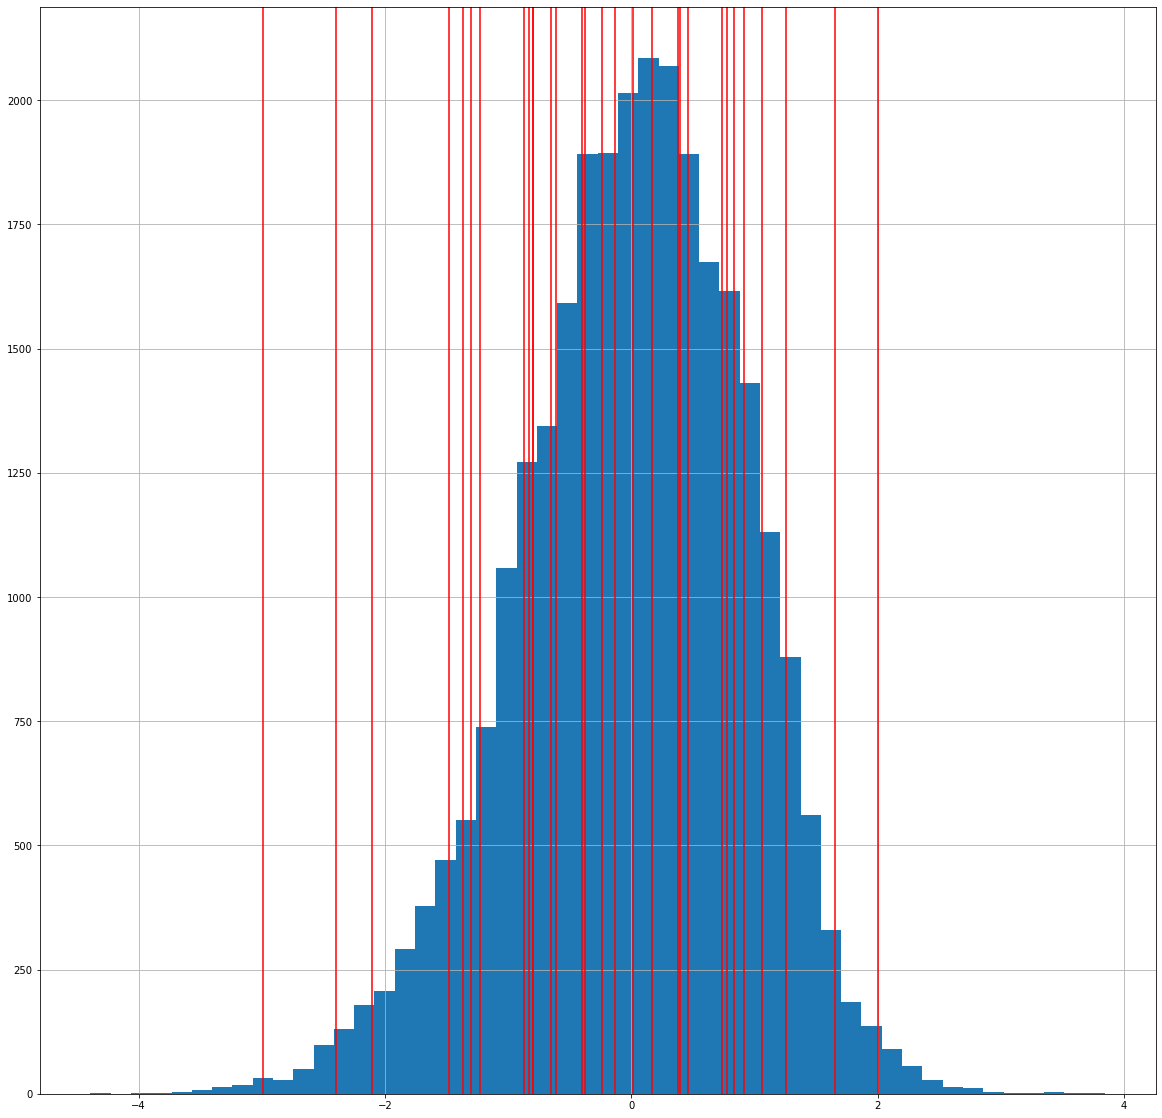

In [60]:
val_re["V15"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V15"],color="red")
plt.axvline(val_fraud.loc[641]["V15"],color="red")
plt.axvline(val_fraud.loc[677]["V15"],color="red")
plt.axvline(val_fraud.loc[836]["V15"],color="red")
plt.axvline(val_fraud.loc[1196]["V15"],color="red")
plt.axvline(val_fraud.loc[1201]["V15"],color="red")
plt.axvline(val_fraud.loc[1547]["V15"],color="red")
plt.axvline(val_fraud.loc[3055]["V15"],color="red")
plt.axvline(val_fraud.loc[4039]["V15"],color="red")
plt.axvline(val_fraud.loc[4267]["V15"],color="red")
plt.axvline(val_fraud.loc[4396]["V15"],color="red")
plt.axvline(val_fraud.loc[7702]["V15"],color="red")
plt.axvline(val_fraud.loc[9326]["V15"],color="red")
plt.axvline(val_fraud.loc[12377]["V15"],color="red")
plt.axvline(val_fraud.loc[12797]["V15"],color="red")
plt.axvline(val_fraud.loc[13706]["V15"],color="red")
plt.axvline(val_fraud.loc[14221]["V15"],color="red")
plt.axvline(val_fraud.loc[15027]["V15"],color="red")
plt.axvline(val_fraud.loc[15029]["V15"],color="red")
plt.axvline(val_fraud.loc[15030]["V15"],color="red")
plt.axvline(val_fraud.loc[15054]["V15"],color="red")
plt.axvline(val_fraud.loc[15345]["V15"],color="red")
plt.axvline(val_fraud.loc[15425]["V15"],color="red")
plt.axvline(val_fraud.loc[24110]["V15"],color="red")
plt.axvline(val_fraud.loc[24358]["V15"],color="red")
plt.axvline(val_fraud.loc[24742]["V15"],color="red")
plt.axvline(val_fraud.loc[25042]["V15"],color="red")
plt.axvline(val_fraud.loc[25504]["V15"],color="red")
plt.axvline(val_fraud.loc[27998]["V15"],color="red")
plt.axvline(val_fraud.loc[28146]["V15"],color="red")
plt.show()

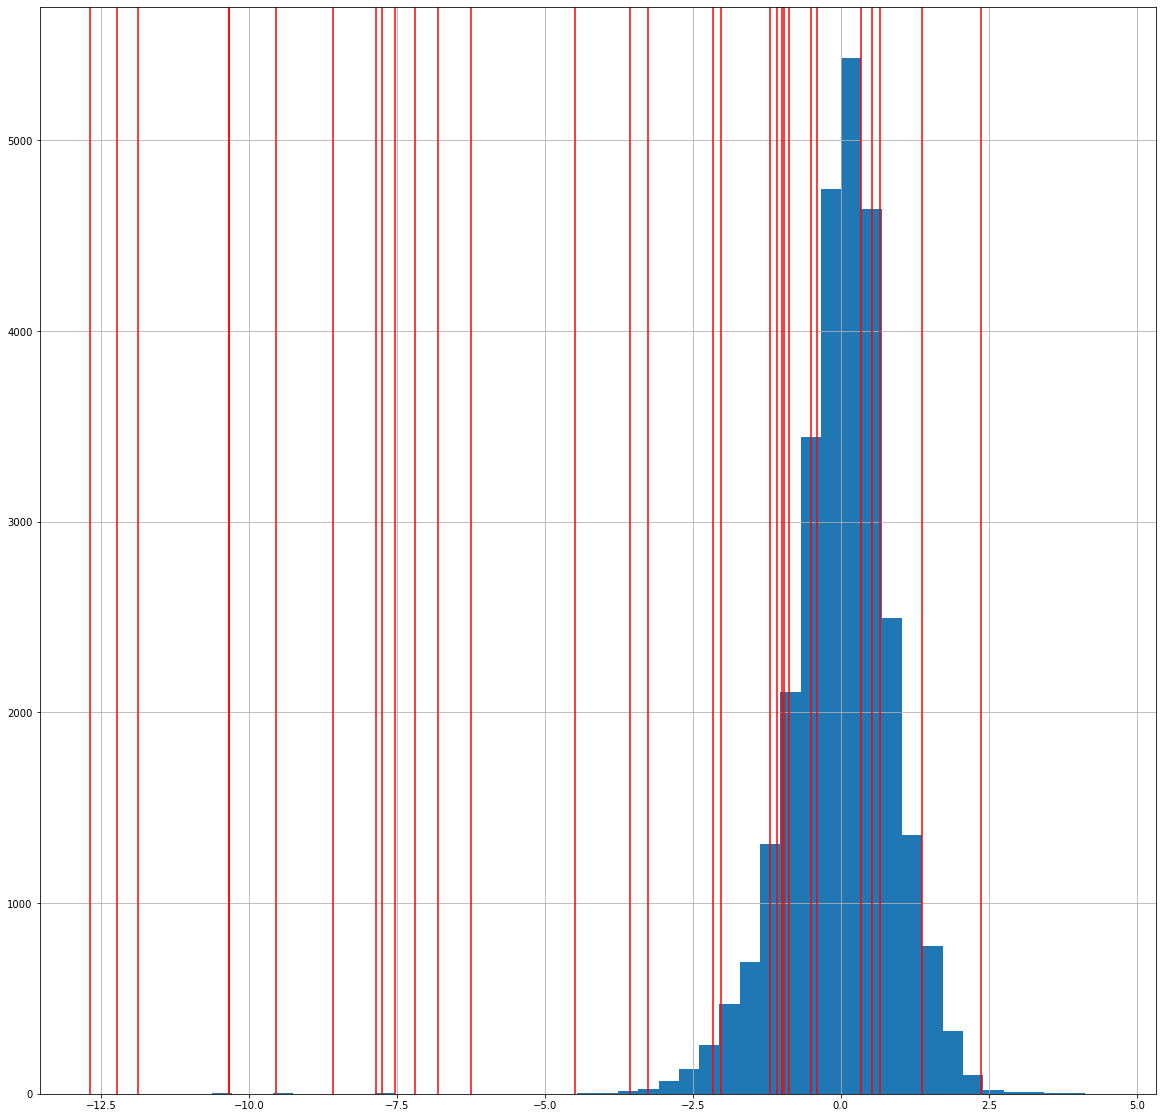

In [61]:
val_re["V16"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V16"],color="red")
plt.axvline(val_fraud.loc[641]["V16"],color="red")
plt.axvline(val_fraud.loc[677]["V16"],color="red")
plt.axvline(val_fraud.loc[836]["V16"],color="red")
plt.axvline(val_fraud.loc[1196]["V16"],color="red")
plt.axvline(val_fraud.loc[1201]["V16"],color="red")
plt.axvline(val_fraud.loc[1547]["V16"],color="red")
plt.axvline(val_fraud.loc[3055]["V16"],color="red")
plt.axvline(val_fraud.loc[4039]["V16"],color="red")
plt.axvline(val_fraud.loc[4267]["V16"],color="red")
plt.axvline(val_fraud.loc[4396]["V16"],color="red")
plt.axvline(val_fraud.loc[7702]["V16"],color="red")
plt.axvline(val_fraud.loc[9326]["V16"],color="red")
plt.axvline(val_fraud.loc[12377]["V16"],color="red")
plt.axvline(val_fraud.loc[12797]["V16"],color="red")
plt.axvline(val_fraud.loc[13706]["V16"],color="red")
plt.axvline(val_fraud.loc[14221]["V16"],color="red")
plt.axvline(val_fraud.loc[15027]["V16"],color="red")
plt.axvline(val_fraud.loc[15029]["V16"],color="red")
plt.axvline(val_fraud.loc[15030]["V16"],color="red")
plt.axvline(val_fraud.loc[15054]["V16"],color="red")
plt.axvline(val_fraud.loc[15345]["V16"],color="red")
plt.axvline(val_fraud.loc[15425]["V16"],color="red")
plt.axvline(val_fraud.loc[24110]["V16"],color="red")
plt.axvline(val_fraud.loc[24358]["V16"],color="red")
plt.axvline(val_fraud.loc[24742]["V16"],color="red")
plt.axvline(val_fraud.loc[25042]["V16"],color="red")
plt.axvline(val_fraud.loc[25504]["V16"],color="red")
plt.axvline(val_fraud.loc[27998]["V16"],color="red")
plt.axvline(val_fraud.loc[28146]["V16"],color="red")
plt.show()

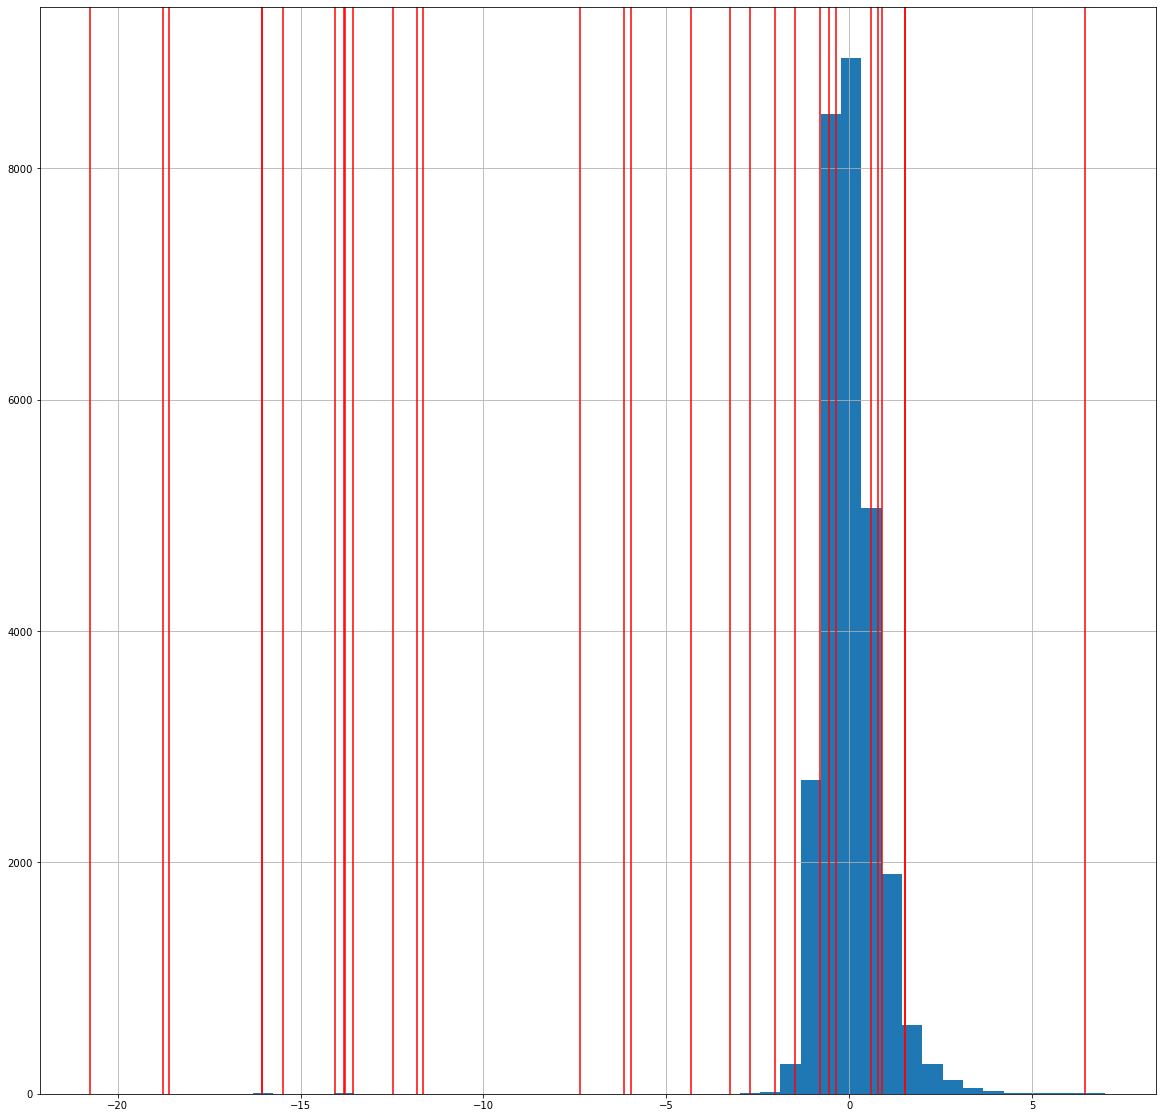

In [62]:
val_re["V17"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V17"],color="red")
plt.axvline(val_fraud.loc[641]["V17"],color="red")
plt.axvline(val_fraud.loc[677]["V17"],color="red")
plt.axvline(val_fraud.loc[836]["V17"],color="red")
plt.axvline(val_fraud.loc[1196]["V17"],color="red")
plt.axvline(val_fraud.loc[1201]["V17"],color="red")
plt.axvline(val_fraud.loc[1547]["V17"],color="red")
plt.axvline(val_fraud.loc[3055]["V17"],color="red")
plt.axvline(val_fraud.loc[4039]["V17"],color="red")
plt.axvline(val_fraud.loc[4267]["V17"],color="red")
plt.axvline(val_fraud.loc[4396]["V17"],color="red")
plt.axvline(val_fraud.loc[7702]["V17"],color="red")
plt.axvline(val_fraud.loc[9326]["V17"],color="red")
plt.axvline(val_fraud.loc[12377]["V17"],color="red")
plt.axvline(val_fraud.loc[12797]["V17"],color="red")
plt.axvline(val_fraud.loc[13706]["V17"],color="red")
plt.axvline(val_fraud.loc[14221]["V17"],color="red")
plt.axvline(val_fraud.loc[15027]["V17"],color="red")
plt.axvline(val_fraud.loc[15029]["V17"],color="red")
plt.axvline(val_fraud.loc[15030]["V17"],color="red")
plt.axvline(val_fraud.loc[15054]["V17"],color="red")
plt.axvline(val_fraud.loc[15345]["V17"],color="red")
plt.axvline(val_fraud.loc[15425]["V17"],color="red")
plt.axvline(val_fraud.loc[24110]["V17"],color="red")
plt.axvline(val_fraud.loc[24358]["V17"],color="red")
plt.axvline(val_fraud.loc[24742]["V17"],color="red")
plt.axvline(val_fraud.loc[25042]["V17"],color="red")
plt.axvline(val_fraud.loc[25504]["V17"],color="red")
plt.axvline(val_fraud.loc[27998]["V17"],color="red")
plt.axvline(val_fraud.loc[28146]["V17"],color="red")
plt.show()

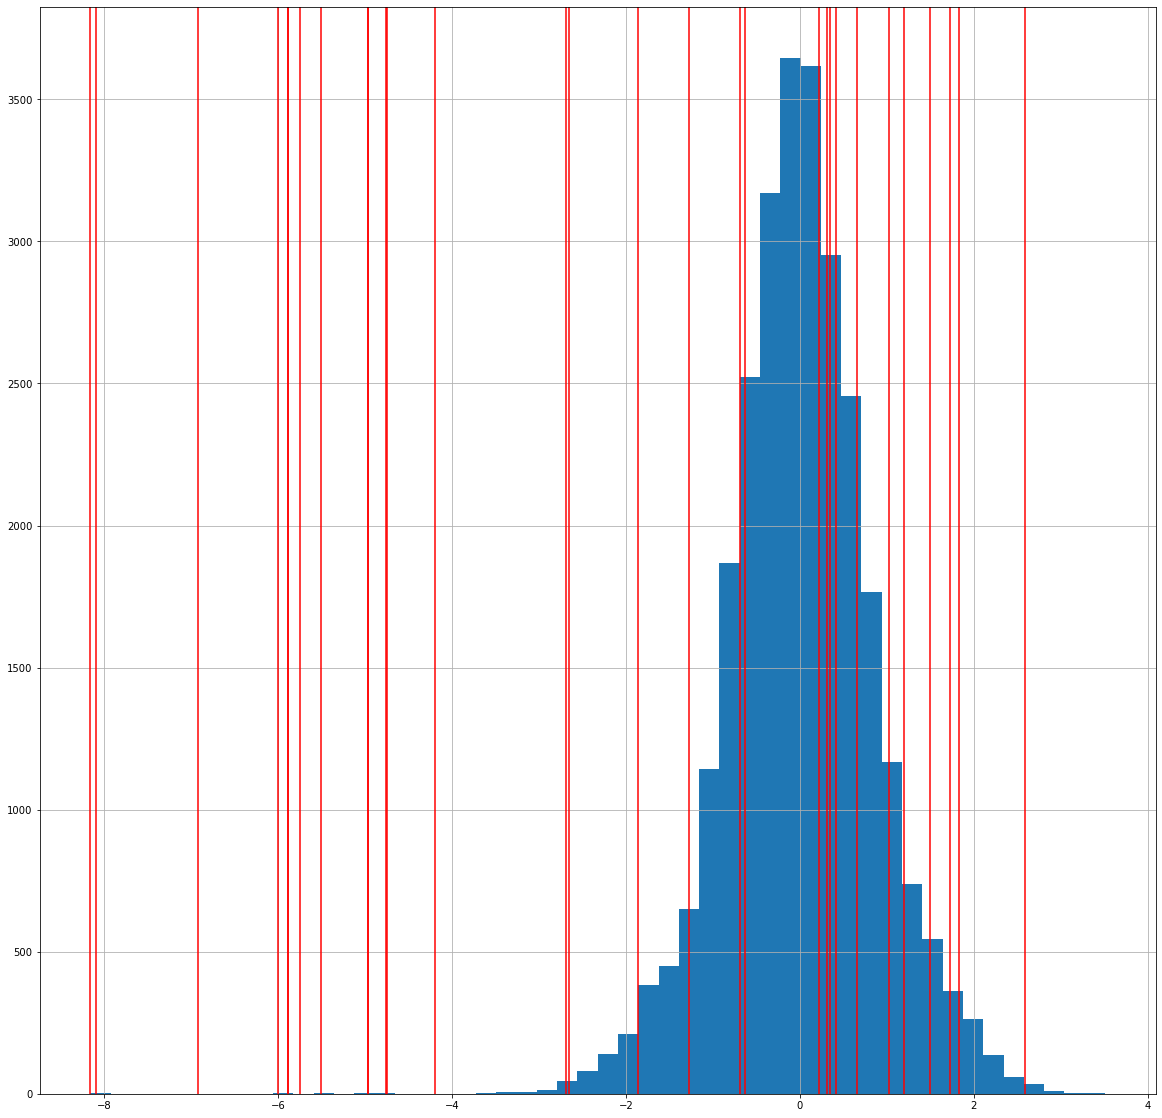

In [63]:
val_re["V18"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V18"],color="red")
plt.axvline(val_fraud.loc[641]["V18"],color="red")
plt.axvline(val_fraud.loc[677]["V18"],color="red")
plt.axvline(val_fraud.loc[836]["V18"],color="red")
plt.axvline(val_fraud.loc[1196]["V18"],color="red")
plt.axvline(val_fraud.loc[1201]["V18"],color="red")
plt.axvline(val_fraud.loc[1547]["V18"],color="red")
plt.axvline(val_fraud.loc[3055]["V18"],color="red")
plt.axvline(val_fraud.loc[4039]["V18"],color="red")
plt.axvline(val_fraud.loc[4267]["V18"],color="red")
plt.axvline(val_fraud.loc[4396]["V18"],color="red")
plt.axvline(val_fraud.loc[7702]["V18"],color="red")
plt.axvline(val_fraud.loc[9326]["V18"],color="red")
plt.axvline(val_fraud.loc[12377]["V18"],color="red")
plt.axvline(val_fraud.loc[12797]["V18"],color="red")
plt.axvline(val_fraud.loc[13706]["V18"],color="red")
plt.axvline(val_fraud.loc[14221]["V18"],color="red")
plt.axvline(val_fraud.loc[15027]["V18"],color="red")
plt.axvline(val_fraud.loc[15029]["V18"],color="red")
plt.axvline(val_fraud.loc[15030]["V18"],color="red")
plt.axvline(val_fraud.loc[15054]["V18"],color="red")
plt.axvline(val_fraud.loc[15345]["V18"],color="red")
plt.axvline(val_fraud.loc[15425]["V18"],color="red")
plt.axvline(val_fraud.loc[24110]["V18"],color="red")
plt.axvline(val_fraud.loc[24358]["V18"],color="red")
plt.axvline(val_fraud.loc[24742]["V18"],color="red")
plt.axvline(val_fraud.loc[25042]["V18"],color="red")
plt.axvline(val_fraud.loc[25504]["V18"],color="red")
plt.axvline(val_fraud.loc[27998]["V18"],color="red")
plt.axvline(val_fraud.loc[28146]["V18"],color="red")
plt.show()

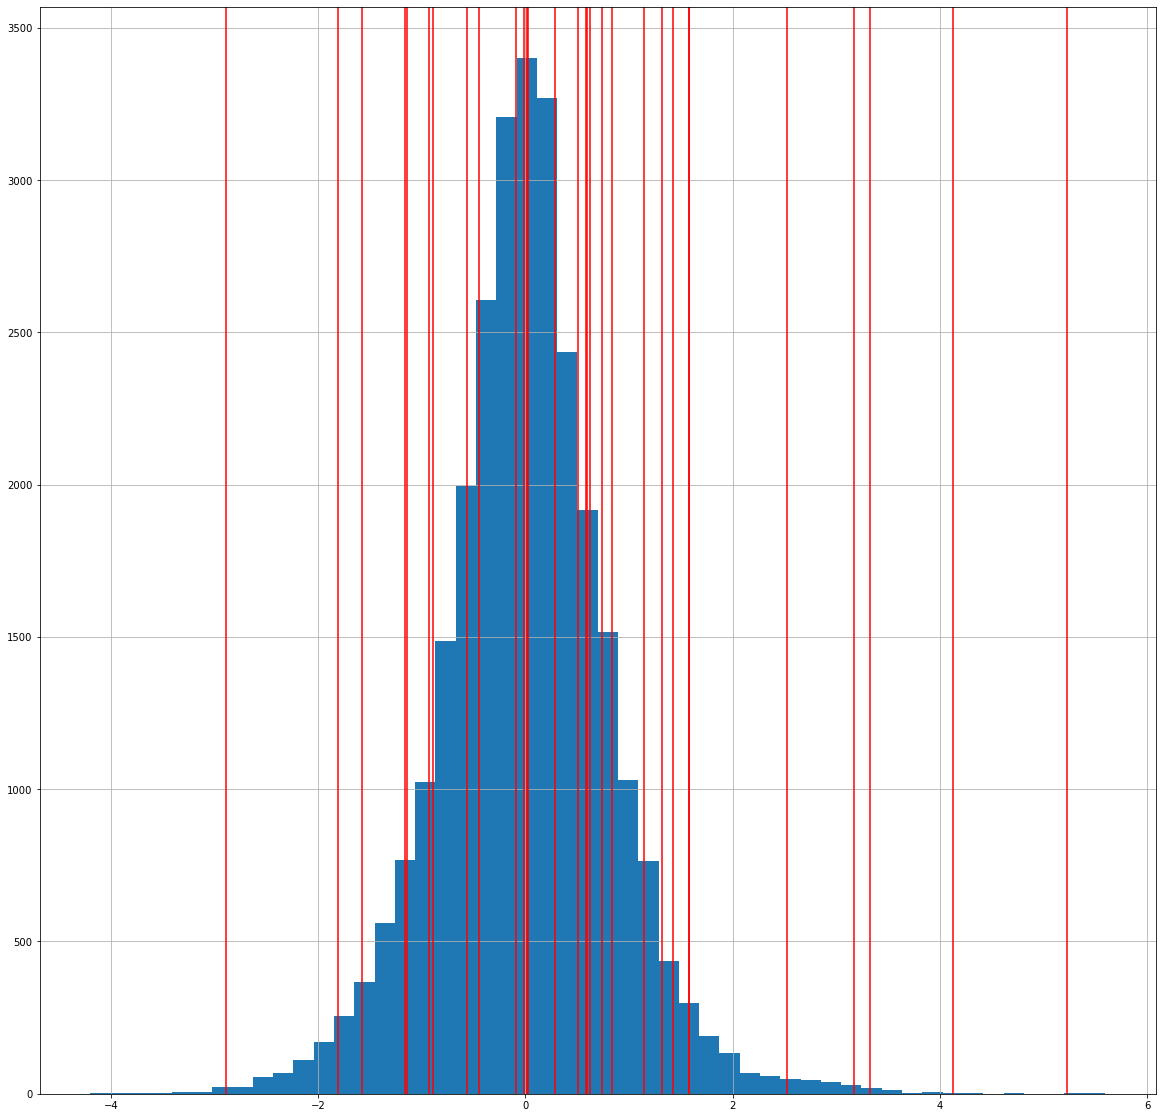

In [64]:
val_re["V19"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V19"],color="red")
plt.axvline(val_fraud.loc[641]["V19"],color="red")
plt.axvline(val_fraud.loc[677]["V19"],color="red")
plt.axvline(val_fraud.loc[836]["V19"],color="red")
plt.axvline(val_fraud.loc[1196]["V19"],color="red")
plt.axvline(val_fraud.loc[1201]["V19"],color="red")
plt.axvline(val_fraud.loc[1547]["V19"],color="red")
plt.axvline(val_fraud.loc[3055]["V19"],color="red")
plt.axvline(val_fraud.loc[4039]["V19"],color="red")
plt.axvline(val_fraud.loc[4267]["V19"],color="red")
plt.axvline(val_fraud.loc[4396]["V19"],color="red")
plt.axvline(val_fraud.loc[7702]["V19"],color="red")
plt.axvline(val_fraud.loc[9326]["V19"],color="red")
plt.axvline(val_fraud.loc[12377]["V19"],color="red")
plt.axvline(val_fraud.loc[12797]["V19"],color="red")
plt.axvline(val_fraud.loc[13706]["V19"],color="red")
plt.axvline(val_fraud.loc[14221]["V19"],color="red")
plt.axvline(val_fraud.loc[15027]["V19"],color="red")
plt.axvline(val_fraud.loc[15029]["V19"],color="red")
plt.axvline(val_fraud.loc[15030]["V19"],color="red")
plt.axvline(val_fraud.loc[15054]["V19"],color="red")
plt.axvline(val_fraud.loc[15345]["V19"],color="red")
plt.axvline(val_fraud.loc[15425]["V19"],color="red")
plt.axvline(val_fraud.loc[24110]["V19"],color="red")
plt.axvline(val_fraud.loc[24358]["V19"],color="red")
plt.axvline(val_fraud.loc[24742]["V19"],color="red")
plt.axvline(val_fraud.loc[25042]["V19"],color="red")
plt.axvline(val_fraud.loc[25504]["V19"],color="red")
plt.axvline(val_fraud.loc[27998]["V19"],color="red")
plt.axvline(val_fraud.loc[28146]["V19"],color="red")
plt.show()

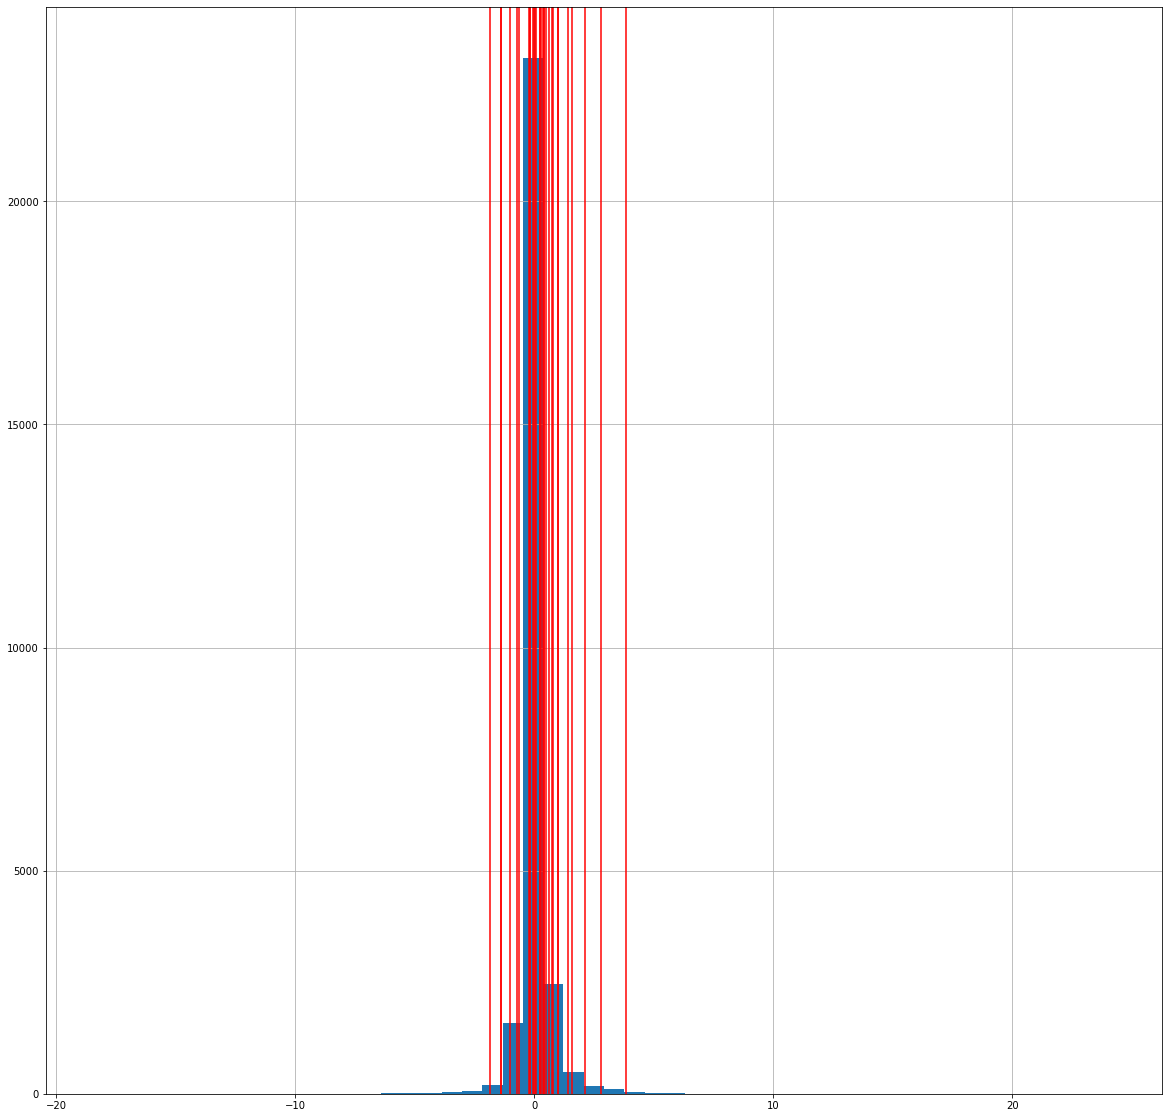

In [65]:
val_re["V20"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V20"],color="red")
plt.axvline(val_fraud.loc[641]["V20"],color="red")
plt.axvline(val_fraud.loc[677]["V20"],color="red")
plt.axvline(val_fraud.loc[836]["V20"],color="red")
plt.axvline(val_fraud.loc[1196]["V20"],color="red")
plt.axvline(val_fraud.loc[1201]["V20"],color="red")
plt.axvline(val_fraud.loc[1547]["V20"],color="red")
plt.axvline(val_fraud.loc[3055]["V20"],color="red")
plt.axvline(val_fraud.loc[4039]["V20"],color="red")
plt.axvline(val_fraud.loc[4267]["V20"],color="red")
plt.axvline(val_fraud.loc[4396]["V20"],color="red")
plt.axvline(val_fraud.loc[7702]["V20"],color="red")
plt.axvline(val_fraud.loc[9326]["V20"],color="red")
plt.axvline(val_fraud.loc[12377]["V20"],color="red")
plt.axvline(val_fraud.loc[12797]["V20"],color="red")
plt.axvline(val_fraud.loc[13706]["V20"],color="red")
plt.axvline(val_fraud.loc[14221]["V20"],color="red")
plt.axvline(val_fraud.loc[15027]["V20"],color="red")
plt.axvline(val_fraud.loc[15029]["V20"],color="red")
plt.axvline(val_fraud.loc[15030]["V20"],color="red")
plt.axvline(val_fraud.loc[15054]["V20"],color="red")
plt.axvline(val_fraud.loc[15345]["V20"],color="red")
plt.axvline(val_fraud.loc[15425]["V20"],color="red")
plt.axvline(val_fraud.loc[24110]["V20"],color="red")
plt.axvline(val_fraud.loc[24358]["V20"],color="red")
plt.axvline(val_fraud.loc[24742]["V20"],color="red")
plt.axvline(val_fraud.loc[25042]["V20"],color="red")
plt.axvline(val_fraud.loc[25504]["V20"],color="red")
plt.axvline(val_fraud.loc[27998]["V20"],color="red")
plt.axvline(val_fraud.loc[28146]["V20"],color="red")
plt.show()

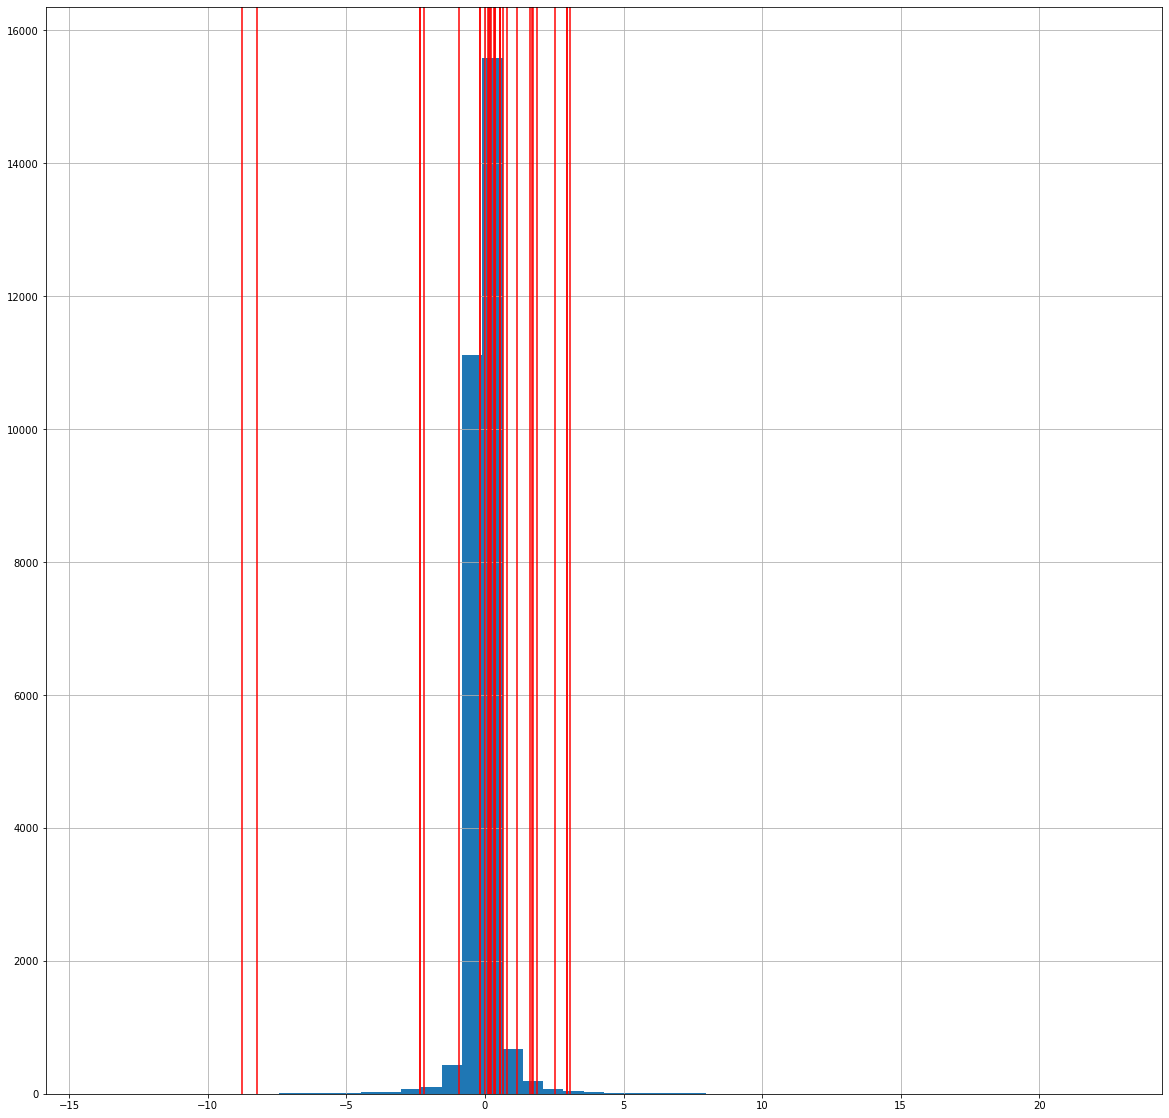

In [66]:
val_re["V21"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V21"],color="red")
plt.axvline(val_fraud.loc[641]["V21"],color="red")
plt.axvline(val_fraud.loc[677]["V21"],color="red")
plt.axvline(val_fraud.loc[836]["V21"],color="red")
plt.axvline(val_fraud.loc[1196]["V21"],color="red")
plt.axvline(val_fraud.loc[1201]["V21"],color="red")
plt.axvline(val_fraud.loc[1547]["V21"],color="red")
plt.axvline(val_fraud.loc[3055]["V21"],color="red")
plt.axvline(val_fraud.loc[4039]["V21"],color="red")
plt.axvline(val_fraud.loc[4267]["V21"],color="red")
plt.axvline(val_fraud.loc[4396]["V21"],color="red")
plt.axvline(val_fraud.loc[7702]["V21"],color="red")
plt.axvline(val_fraud.loc[9326]["V21"],color="red")
plt.axvline(val_fraud.loc[12377]["V21"],color="red")
plt.axvline(val_fraud.loc[12797]["V21"],color="red")
plt.axvline(val_fraud.loc[13706]["V21"],color="red")
plt.axvline(val_fraud.loc[14221]["V21"],color="red")
plt.axvline(val_fraud.loc[15027]["V21"],color="red")
plt.axvline(val_fraud.loc[15029]["V21"],color="red")
plt.axvline(val_fraud.loc[15030]["V21"],color="red")
plt.axvline(val_fraud.loc[15054]["V21"],color="red")
plt.axvline(val_fraud.loc[15345]["V21"],color="red")
plt.axvline(val_fraud.loc[15425]["V21"],color="red")
plt.axvline(val_fraud.loc[24110]["V21"],color="red")
plt.axvline(val_fraud.loc[24358]["V21"],color="red")
plt.axvline(val_fraud.loc[24742]["V21"],color="red")
plt.axvline(val_fraud.loc[25042]["V21"],color="red")
plt.axvline(val_fraud.loc[25504]["V21"],color="red")
plt.axvline(val_fraud.loc[27998]["V21"],color="red")
plt.axvline(val_fraud.loc[28146]["V21"],color="red")
plt.show()

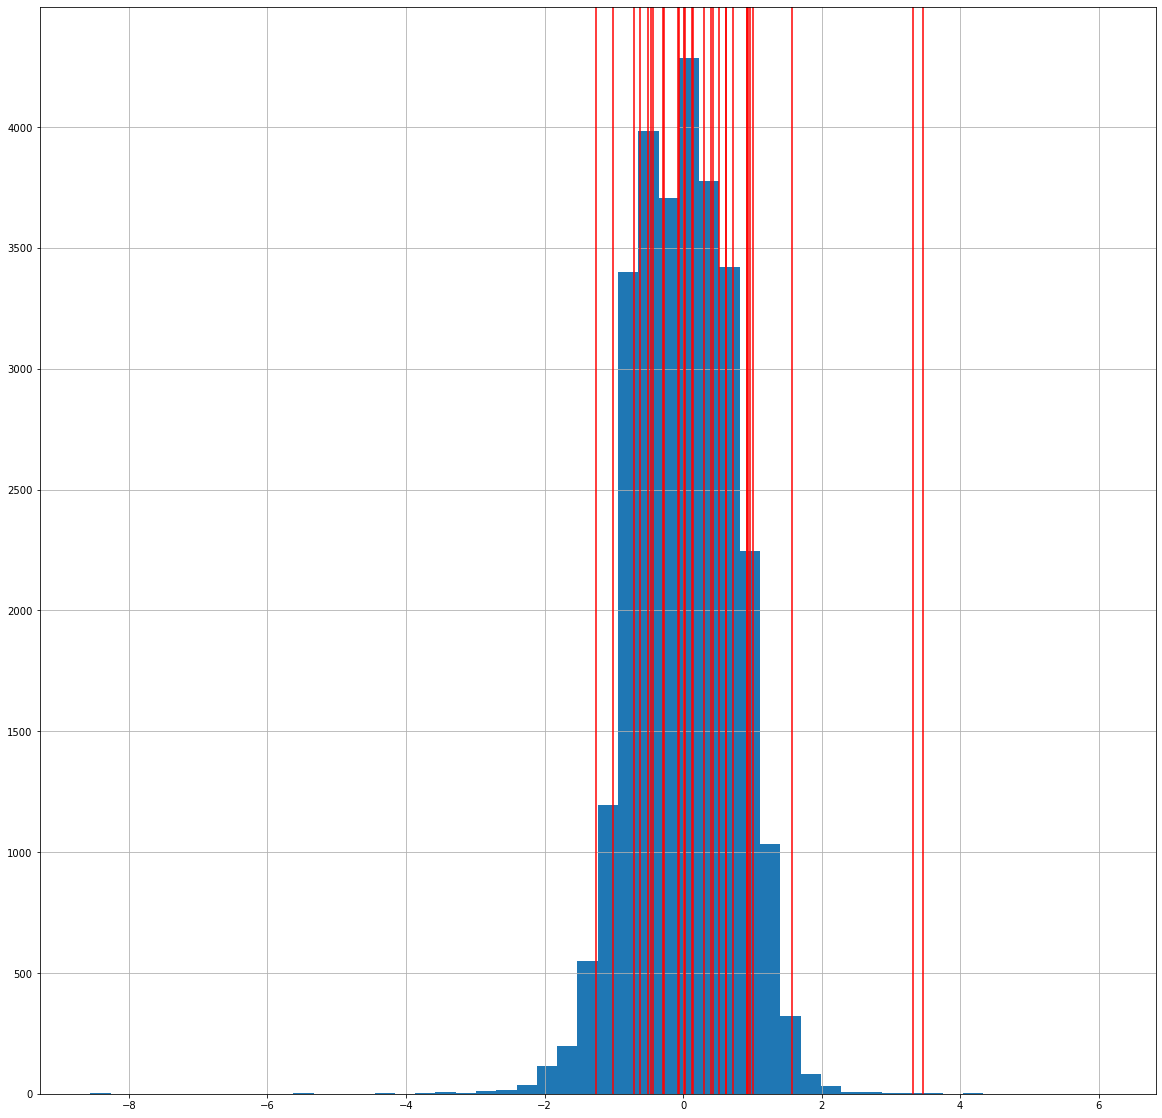

In [67]:
val_re["V22"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V22"],color="red")
plt.axvline(val_fraud.loc[641]["V22"],color="red")
plt.axvline(val_fraud.loc[677]["V22"],color="red")
plt.axvline(val_fraud.loc[836]["V22"],color="red")
plt.axvline(val_fraud.loc[1196]["V22"],color="red")
plt.axvline(val_fraud.loc[1201]["V22"],color="red")
plt.axvline(val_fraud.loc[1547]["V22"],color="red")
plt.axvline(val_fraud.loc[3055]["V22"],color="red")
plt.axvline(val_fraud.loc[4039]["V22"],color="red")
plt.axvline(val_fraud.loc[4267]["V22"],color="red")
plt.axvline(val_fraud.loc[4396]["V22"],color="red")
plt.axvline(val_fraud.loc[7702]["V22"],color="red")
plt.axvline(val_fraud.loc[9326]["V22"],color="red")
plt.axvline(val_fraud.loc[12377]["V22"],color="red")
plt.axvline(val_fraud.loc[12797]["V22"],color="red")
plt.axvline(val_fraud.loc[13706]["V22"],color="red")
plt.axvline(val_fraud.loc[14221]["V22"],color="red")
plt.axvline(val_fraud.loc[15027]["V22"],color="red")
plt.axvline(val_fraud.loc[15029]["V22"],color="red")
plt.axvline(val_fraud.loc[15030]["V22"],color="red")
plt.axvline(val_fraud.loc[15054]["V22"],color="red")
plt.axvline(val_fraud.loc[15345]["V22"],color="red")
plt.axvline(val_fraud.loc[15425]["V22"],color="red")
plt.axvline(val_fraud.loc[24110]["V22"],color="red")
plt.axvline(val_fraud.loc[24358]["V22"],color="red")
plt.axvline(val_fraud.loc[24742]["V22"],color="red")
plt.axvline(val_fraud.loc[25042]["V22"],color="red")
plt.axvline(val_fraud.loc[25504]["V22"],color="red")
plt.axvline(val_fraud.loc[27998]["V22"],color="red")
plt.axvline(val_fraud.loc[28146]["V22"],color="red")
plt.show()

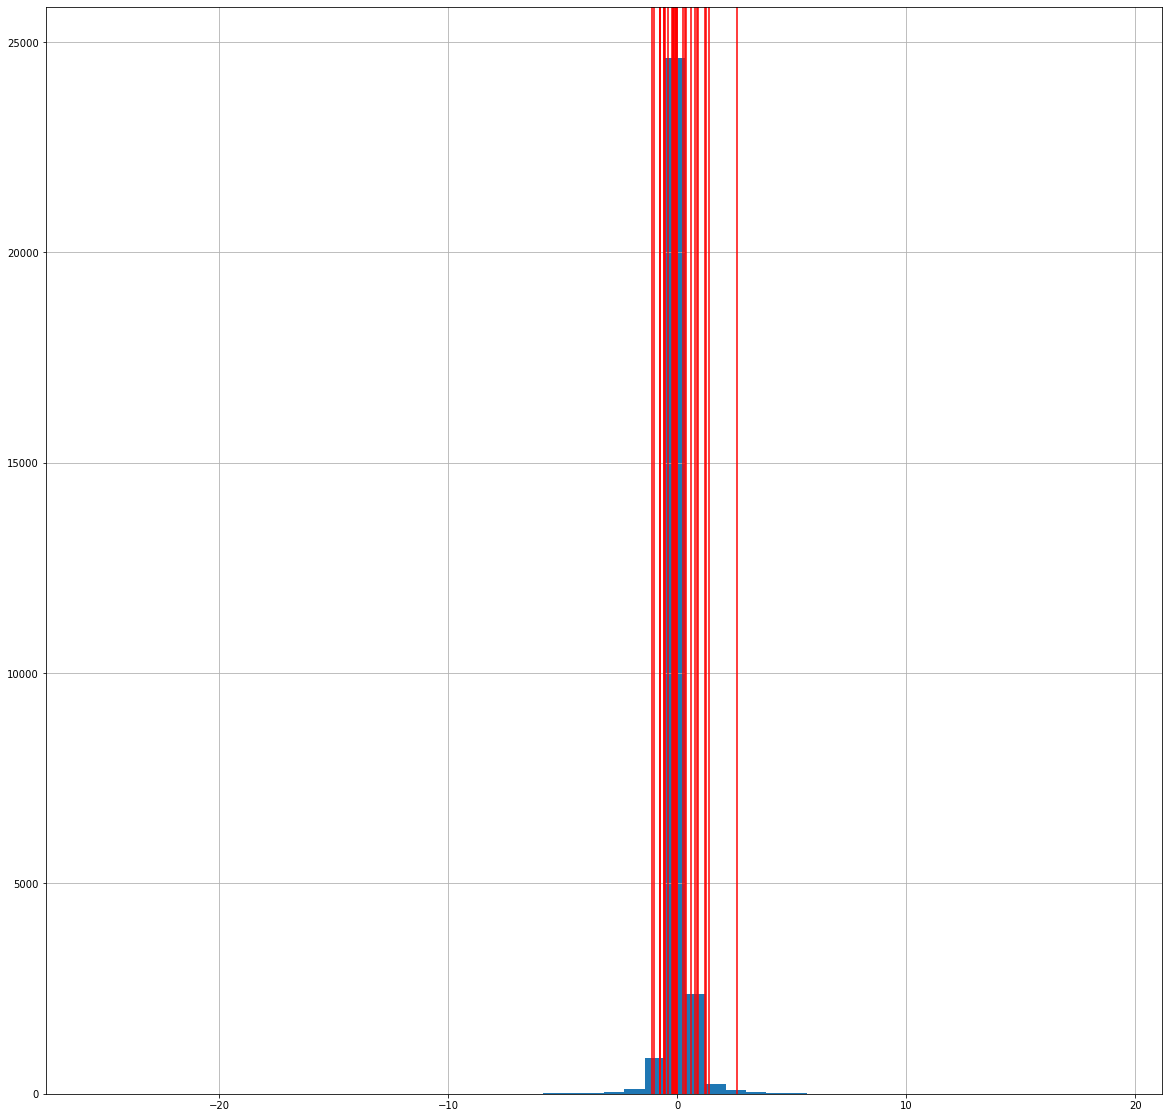

In [68]:
val_re["V23"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V23"],color="red")
plt.axvline(val_fraud.loc[641]["V23"],color="red")
plt.axvline(val_fraud.loc[677]["V23"],color="red")
plt.axvline(val_fraud.loc[836]["V23"],color="red")
plt.axvline(val_fraud.loc[1196]["V23"],color="red")
plt.axvline(val_fraud.loc[1201]["V23"],color="red")
plt.axvline(val_fraud.loc[1547]["V23"],color="red")
plt.axvline(val_fraud.loc[3055]["V23"],color="red")
plt.axvline(val_fraud.loc[4039]["V23"],color="red")
plt.axvline(val_fraud.loc[4267]["V23"],color="red")
plt.axvline(val_fraud.loc[4396]["V23"],color="red")
plt.axvline(val_fraud.loc[7702]["V23"],color="red")
plt.axvline(val_fraud.loc[9326]["V23"],color="red")
plt.axvline(val_fraud.loc[12377]["V23"],color="red")
plt.axvline(val_fraud.loc[12797]["V23"],color="red")
plt.axvline(val_fraud.loc[13706]["V23"],color="red")
plt.axvline(val_fraud.loc[14221]["V23"],color="red")
plt.axvline(val_fraud.loc[15027]["V23"],color="red")
plt.axvline(val_fraud.loc[15029]["V23"],color="red")
plt.axvline(val_fraud.loc[15030]["V23"],color="red")
plt.axvline(val_fraud.loc[15054]["V23"],color="red")
plt.axvline(val_fraud.loc[15345]["V23"],color="red")
plt.axvline(val_fraud.loc[15425]["V23"],color="red")
plt.axvline(val_fraud.loc[24110]["V23"],color="red")
plt.axvline(val_fraud.loc[24358]["V23"],color="red")
plt.axvline(val_fraud.loc[24742]["V23"],color="red")
plt.axvline(val_fraud.loc[25042]["V23"],color="red")
plt.axvline(val_fraud.loc[25504]["V23"],color="red")
plt.axvline(val_fraud.loc[27998]["V23"],color="red")
plt.axvline(val_fraud.loc[28146]["V23"],color="red")
plt.show()

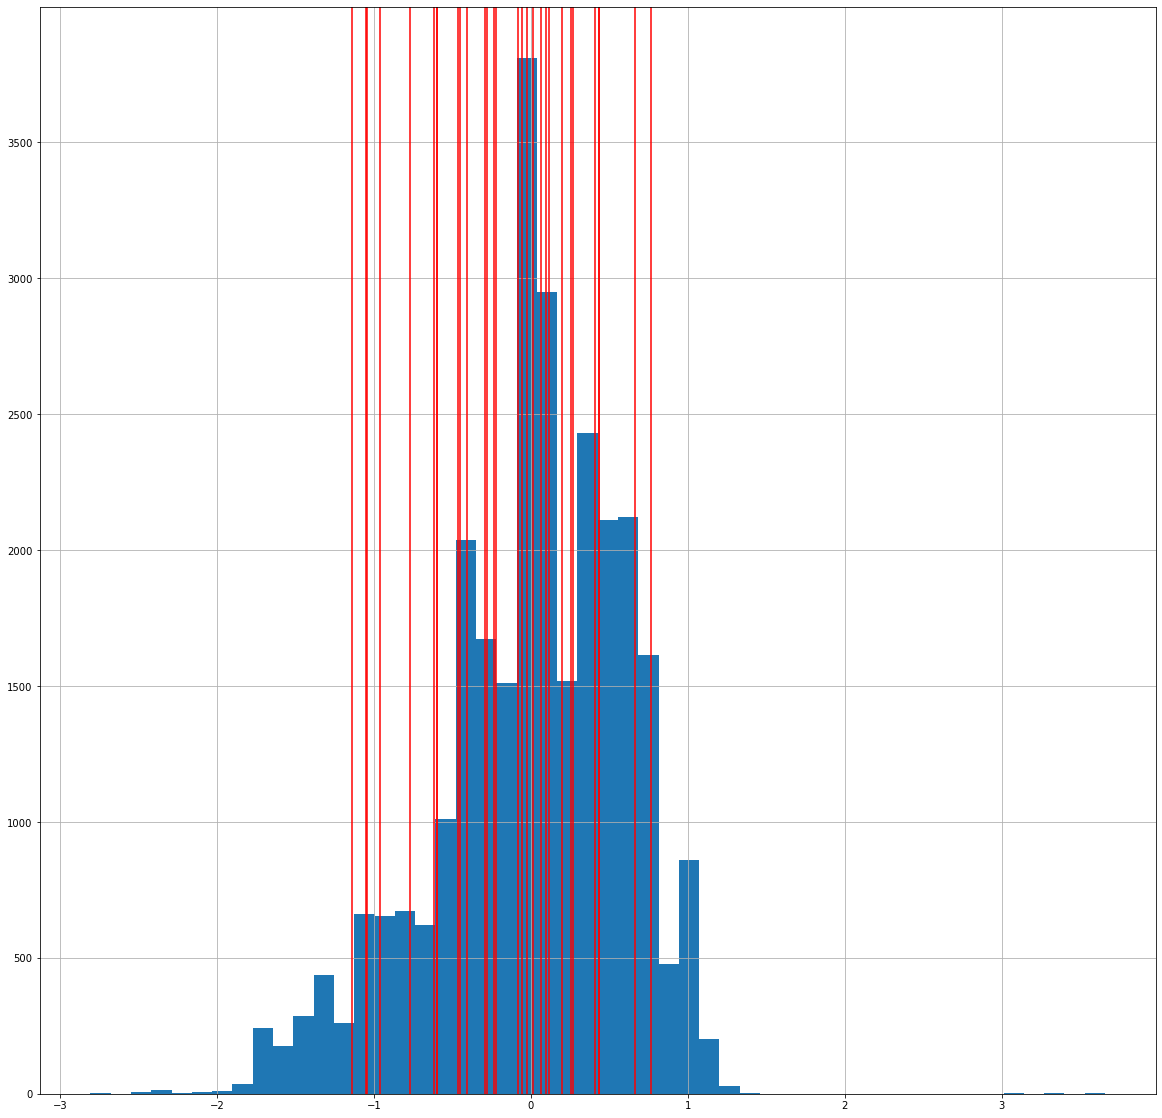

In [69]:
val_re["V24"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V24"],color="red")
plt.axvline(val_fraud.loc[641]["V24"],color="red")
plt.axvline(val_fraud.loc[677]["V24"],color="red")
plt.axvline(val_fraud.loc[836]["V24"],color="red")
plt.axvline(val_fraud.loc[1196]["V24"],color="red")
plt.axvline(val_fraud.loc[1201]["V24"],color="red")
plt.axvline(val_fraud.loc[1547]["V24"],color="red")
plt.axvline(val_fraud.loc[3055]["V24"],color="red")
plt.axvline(val_fraud.loc[4039]["V24"],color="red")
plt.axvline(val_fraud.loc[4267]["V24"],color="red")
plt.axvline(val_fraud.loc[4396]["V24"],color="red")
plt.axvline(val_fraud.loc[7702]["V24"],color="red")
plt.axvline(val_fraud.loc[9326]["V24"],color="red")
plt.axvline(val_fraud.loc[12377]["V24"],color="red")
plt.axvline(val_fraud.loc[12797]["V24"],color="red")
plt.axvline(val_fraud.loc[13706]["V24"],color="red")
plt.axvline(val_fraud.loc[14221]["V24"],color="red")
plt.axvline(val_fraud.loc[15027]["V24"],color="red")
plt.axvline(val_fraud.loc[15029]["V24"],color="red")
plt.axvline(val_fraud.loc[15030]["V24"],color="red")
plt.axvline(val_fraud.loc[15054]["V24"],color="red")
plt.axvline(val_fraud.loc[15345]["V24"],color="red")
plt.axvline(val_fraud.loc[15425]["V24"],color="red")
plt.axvline(val_fraud.loc[24110]["V24"],color="red")
plt.axvline(val_fraud.loc[24358]["V24"],color="red")
plt.axvline(val_fraud.loc[24742]["V24"],color="red")
plt.axvline(val_fraud.loc[25042]["V24"],color="red")
plt.axvline(val_fraud.loc[25504]["V24"],color="red")
plt.axvline(val_fraud.loc[27998]["V24"],color="red")
plt.axvline(val_fraud.loc[28146]["V24"],color="red")
plt.show()

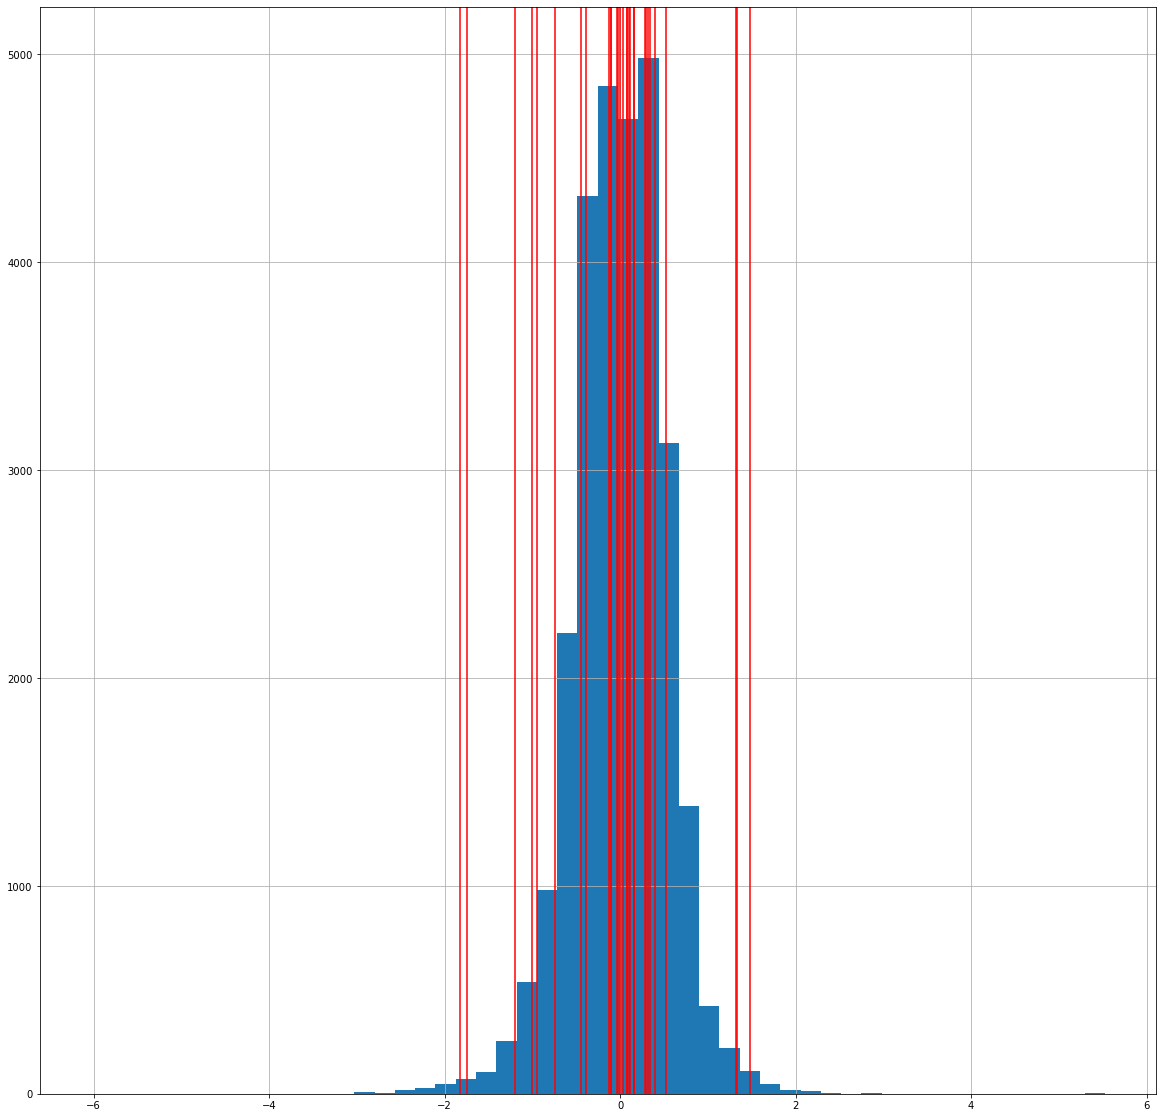

In [70]:
val_re["V25"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V25"],color="red")
plt.axvline(val_fraud.loc[641]["V25"],color="red")
plt.axvline(val_fraud.loc[677]["V25"],color="red")
plt.axvline(val_fraud.loc[836]["V25"],color="red")
plt.axvline(val_fraud.loc[1196]["V25"],color="red")
plt.axvline(val_fraud.loc[1201]["V25"],color="red")
plt.axvline(val_fraud.loc[1547]["V25"],color="red")
plt.axvline(val_fraud.loc[3055]["V25"],color="red")
plt.axvline(val_fraud.loc[4039]["V25"],color="red")
plt.axvline(val_fraud.loc[4267]["V25"],color="red")
plt.axvline(val_fraud.loc[4396]["V25"],color="red")
plt.axvline(val_fraud.loc[7702]["V25"],color="red")
plt.axvline(val_fraud.loc[9326]["V25"],color="red")
plt.axvline(val_fraud.loc[12377]["V25"],color="red")
plt.axvline(val_fraud.loc[12797]["V25"],color="red")
plt.axvline(val_fraud.loc[13706]["V25"],color="red")
plt.axvline(val_fraud.loc[14221]["V25"],color="red")
plt.axvline(val_fraud.loc[15027]["V25"],color="red")
plt.axvline(val_fraud.loc[15029]["V25"],color="red")
plt.axvline(val_fraud.loc[15030]["V25"],color="red")
plt.axvline(val_fraud.loc[15054]["V25"],color="red")
plt.axvline(val_fraud.loc[15345]["V25"],color="red")
plt.axvline(val_fraud.loc[15425]["V25"],color="red")
plt.axvline(val_fraud.loc[24110]["V25"],color="red")
plt.axvline(val_fraud.loc[24358]["V25"],color="red")
plt.axvline(val_fraud.loc[24742]["V25"],color="red")
plt.axvline(val_fraud.loc[25042]["V25"],color="red")
plt.axvline(val_fraud.loc[25504]["V25"],color="red")
plt.axvline(val_fraud.loc[27998]["V25"],color="red")
plt.axvline(val_fraud.loc[28146]["V25"],color="red")
plt.show()

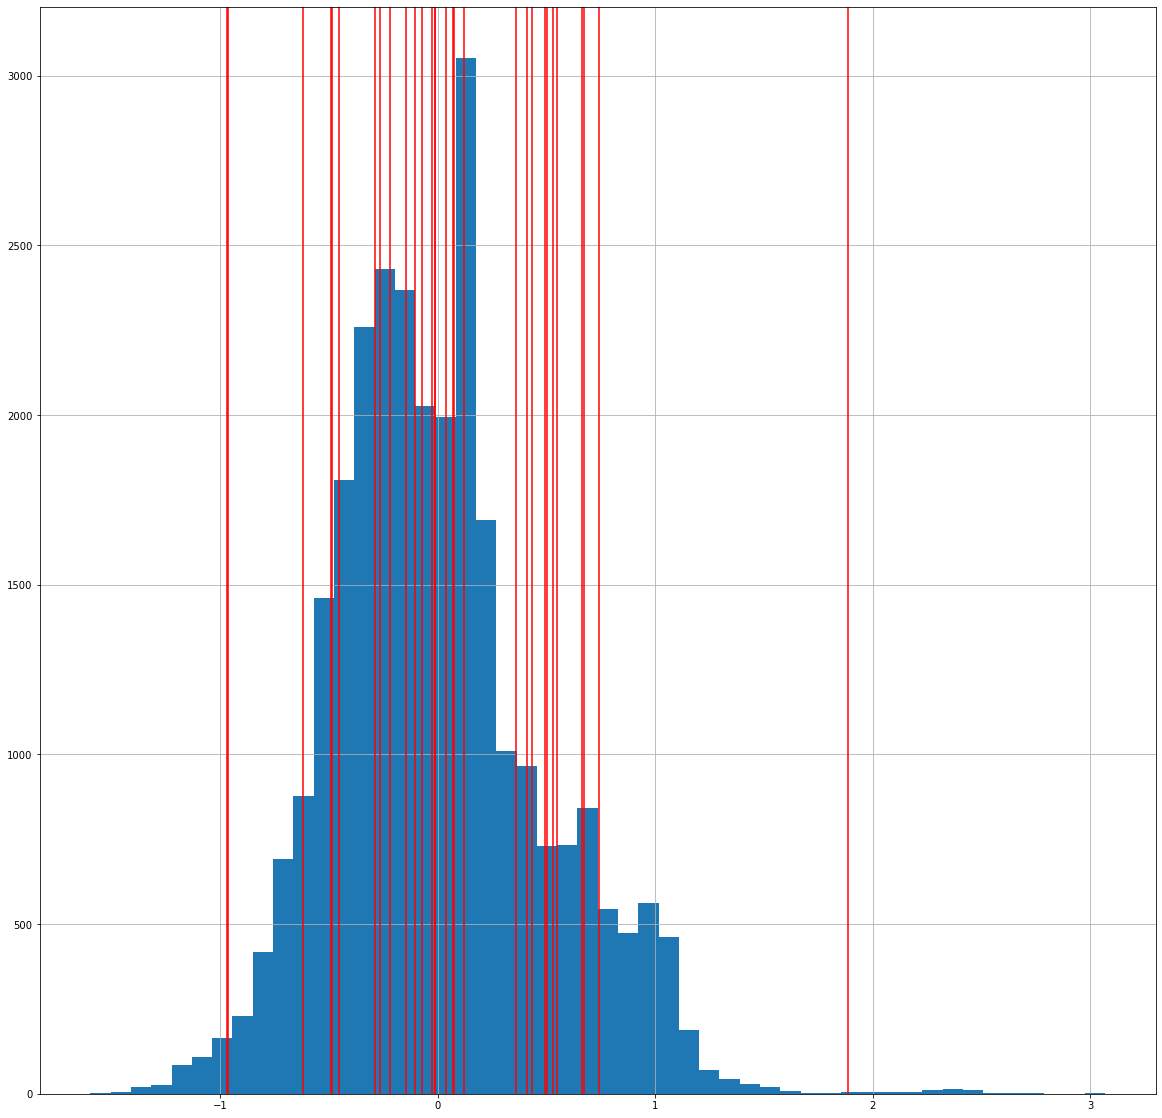

In [71]:
val_re["V26"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V26"],color="red")
plt.axvline(val_fraud.loc[641]["V26"],color="red")
plt.axvline(val_fraud.loc[677]["V26"],color="red")
plt.axvline(val_fraud.loc[836]["V26"],color="red")
plt.axvline(val_fraud.loc[1196]["V26"],color="red")
plt.axvline(val_fraud.loc[1201]["V26"],color="red")
plt.axvline(val_fraud.loc[1547]["V26"],color="red")
plt.axvline(val_fraud.loc[3055]["V26"],color="red")
plt.axvline(val_fraud.loc[4039]["V26"],color="red")
plt.axvline(val_fraud.loc[4267]["V26"],color="red")
plt.axvline(val_fraud.loc[4396]["V26"],color="red")
plt.axvline(val_fraud.loc[7702]["V26"],color="red")
plt.axvline(val_fraud.loc[9326]["V26"],color="red")
plt.axvline(val_fraud.loc[12377]["V26"],color="red")
plt.axvline(val_fraud.loc[12797]["V26"],color="red")
plt.axvline(val_fraud.loc[13706]["V26"],color="red")
plt.axvline(val_fraud.loc[14221]["V26"],color="red")
plt.axvline(val_fraud.loc[15027]["V26"],color="red")
plt.axvline(val_fraud.loc[15029]["V26"],color="red")
plt.axvline(val_fraud.loc[15030]["V26"],color="red")
plt.axvline(val_fraud.loc[15054]["V26"],color="red")
plt.axvline(val_fraud.loc[15345]["V26"],color="red")
plt.axvline(val_fraud.loc[15425]["V26"],color="red")
plt.axvline(val_fraud.loc[24110]["V26"],color="red")
plt.axvline(val_fraud.loc[24358]["V26"],color="red")
plt.axvline(val_fraud.loc[24742]["V26"],color="red")
plt.axvline(val_fraud.loc[25042]["V26"],color="red")
plt.axvline(val_fraud.loc[25504]["V26"],color="red")
plt.axvline(val_fraud.loc[27998]["V26"],color="red")
plt.axvline(val_fraud.loc[28146]["V26"],color="red")
plt.show()

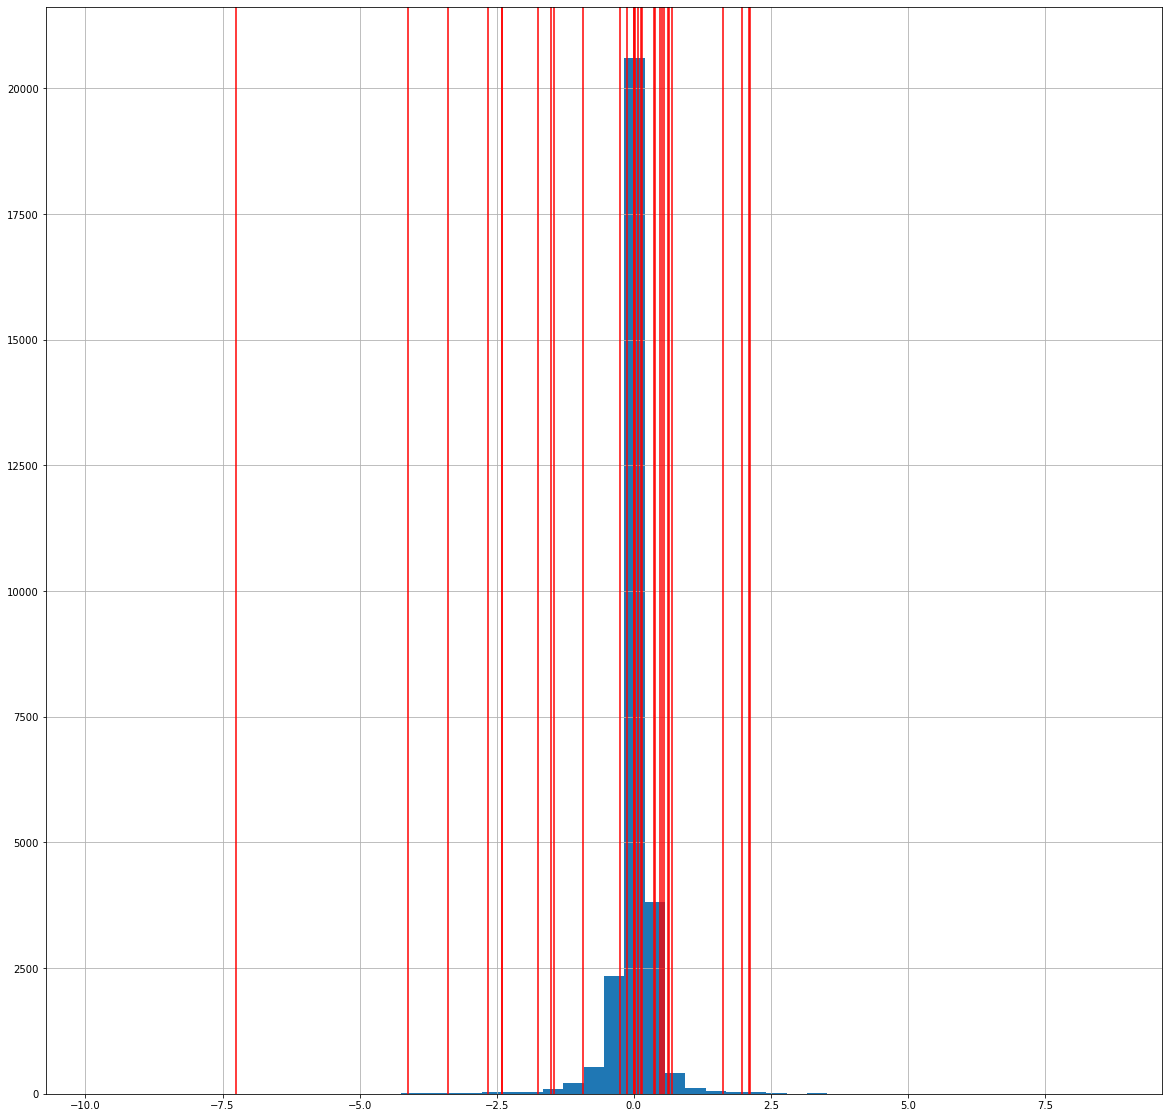

In [72]:
val_re["V27"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V27"],color="red")
plt.axvline(val_fraud.loc[641]["V27"],color="red")
plt.axvline(val_fraud.loc[677]["V27"],color="red")
plt.axvline(val_fraud.loc[836]["V27"],color="red")
plt.axvline(val_fraud.loc[1196]["V27"],color="red")
plt.axvline(val_fraud.loc[1201]["V27"],color="red")
plt.axvline(val_fraud.loc[1547]["V27"],color="red")
plt.axvline(val_fraud.loc[3055]["V27"],color="red")
plt.axvline(val_fraud.loc[4039]["V27"],color="red")
plt.axvline(val_fraud.loc[4267]["V27"],color="red")
plt.axvline(val_fraud.loc[4396]["V27"],color="red")
plt.axvline(val_fraud.loc[7702]["V27"],color="red")
plt.axvline(val_fraud.loc[9326]["V27"],color="red")
plt.axvline(val_fraud.loc[12377]["V27"],color="red")
plt.axvline(val_fraud.loc[12797]["V27"],color="red")
plt.axvline(val_fraud.loc[13706]["V27"],color="red")
plt.axvline(val_fraud.loc[14221]["V27"],color="red")
plt.axvline(val_fraud.loc[15027]["V27"],color="red")
plt.axvline(val_fraud.loc[15029]["V27"],color="red")
plt.axvline(val_fraud.loc[15030]["V27"],color="red")
plt.axvline(val_fraud.loc[15054]["V27"],color="red")
plt.axvline(val_fraud.loc[15345]["V27"],color="red")
plt.axvline(val_fraud.loc[15425]["V27"],color="red")
plt.axvline(val_fraud.loc[24110]["V27"],color="red")
plt.axvline(val_fraud.loc[24358]["V27"],color="red")
plt.axvline(val_fraud.loc[24742]["V27"],color="red")
plt.axvline(val_fraud.loc[25042]["V27"],color="red")
plt.axvline(val_fraud.loc[25504]["V27"],color="red")
plt.axvline(val_fraud.loc[27998]["V27"],color="red")
plt.axvline(val_fraud.loc[28146]["V27"],color="red")
plt.show()

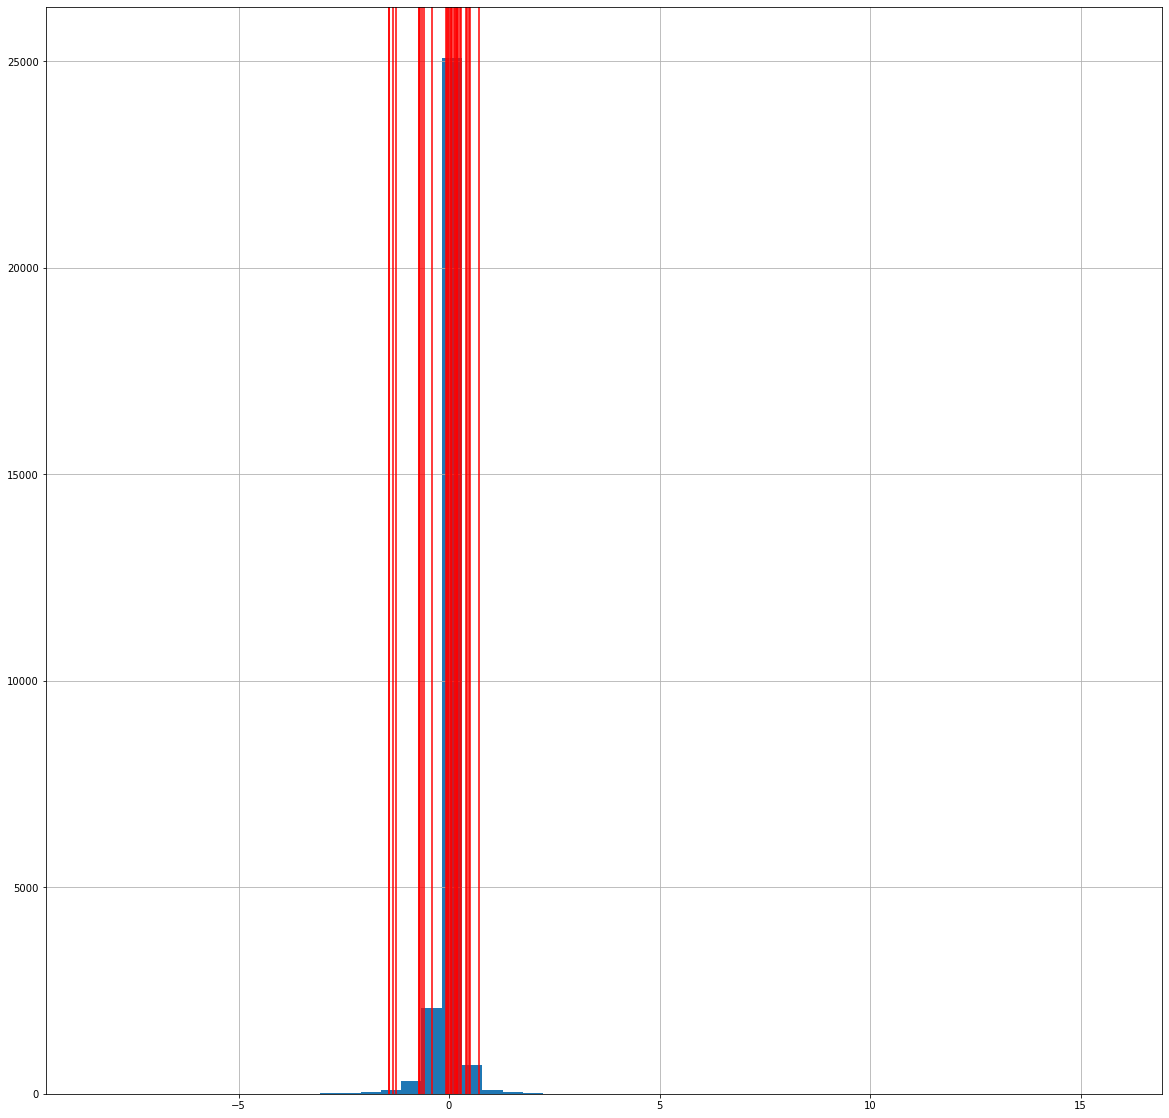

In [73]:
val_re["V28"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V28"],color="red")
plt.axvline(val_fraud.loc[641]["V28"],color="red")
plt.axvline(val_fraud.loc[677]["V28"],color="red")
plt.axvline(val_fraud.loc[836]["V28"],color="red")
plt.axvline(val_fraud.loc[1196]["V28"],color="red")
plt.axvline(val_fraud.loc[1201]["V28"],color="red")
plt.axvline(val_fraud.loc[1547]["V28"],color="red")
plt.axvline(val_fraud.loc[3055]["V28"],color="red")
plt.axvline(val_fraud.loc[4039]["V28"],color="red")
plt.axvline(val_fraud.loc[4267]["V28"],color="red")
plt.axvline(val_fraud.loc[4396]["V28"],color="red")
plt.axvline(val_fraud.loc[7702]["V28"],color="red")
plt.axvline(val_fraud.loc[9326]["V28"],color="red")
plt.axvline(val_fraud.loc[12377]["V28"],color="red")
plt.axvline(val_fraud.loc[12797]["V28"],color="red")
plt.axvline(val_fraud.loc[13706]["V28"],color="red")
plt.axvline(val_fraud.loc[14221]["V28"],color="red")
plt.axvline(val_fraud.loc[15027]["V28"],color="red")
plt.axvline(val_fraud.loc[15029]["V28"],color="red")
plt.axvline(val_fraud.loc[15030]["V28"],color="red")
plt.axvline(val_fraud.loc[15054]["V28"],color="red")
plt.axvline(val_fraud.loc[15345]["V28"],color="red")
plt.axvline(val_fraud.loc[15425]["V28"],color="red")
plt.axvline(val_fraud.loc[24110]["V28"],color="red")
plt.axvline(val_fraud.loc[24358]["V28"],color="red")
plt.axvline(val_fraud.loc[24742]["V28"],color="red")
plt.axvline(val_fraud.loc[25042]["V28"],color="red")
plt.axvline(val_fraud.loc[25504]["V28"],color="red")
plt.axvline(val_fraud.loc[27998]["V28"],color="red")
plt.axvline(val_fraud.loc[28146]["V28"],color="red")
plt.show()

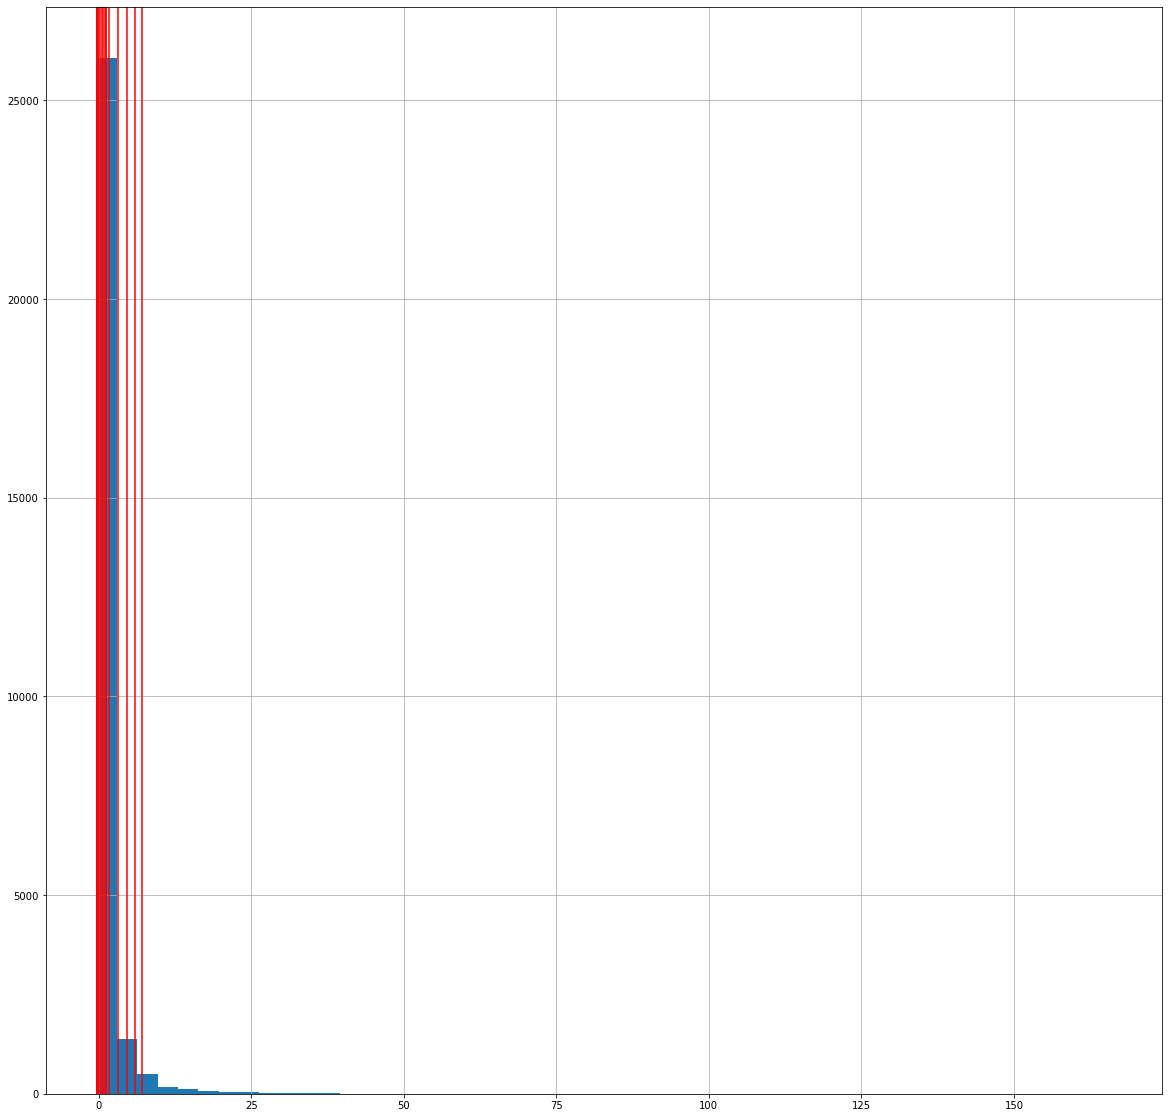

In [74]:
val_re["V29"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V29"],color="red")
plt.axvline(val_fraud.loc[641]["V29"],color="red")
plt.axvline(val_fraud.loc[677]["V29"],color="red")
plt.axvline(val_fraud.loc[836]["V29"],color="red")
plt.axvline(val_fraud.loc[1196]["V29"],color="red")
plt.axvline(val_fraud.loc[1201]["V29"],color="red")
plt.axvline(val_fraud.loc[1547]["V29"],color="red")
plt.axvline(val_fraud.loc[3055]["V29"],color="red")
plt.axvline(val_fraud.loc[4039]["V29"],color="red")
plt.axvline(val_fraud.loc[4267]["V29"],color="red")
plt.axvline(val_fraud.loc[4396]["V29"],color="red")
plt.axvline(val_fraud.loc[7702]["V29"],color="red")
plt.axvline(val_fraud.loc[9326]["V29"],color="red")
plt.axvline(val_fraud.loc[12377]["V29"],color="red")
plt.axvline(val_fraud.loc[12797]["V29"],color="red")
plt.axvline(val_fraud.loc[13706]["V29"],color="red")
plt.axvline(val_fraud.loc[14221]["V29"],color="red")
plt.axvline(val_fraud.loc[15027]["V29"],color="red")
plt.axvline(val_fraud.loc[15029]["V29"],color="red")
plt.axvline(val_fraud.loc[15030]["V29"],color="red")
plt.axvline(val_fraud.loc[15054]["V29"],color="red")
plt.axvline(val_fraud.loc[15345]["V29"],color="red")
plt.axvline(val_fraud.loc[15425]["V29"],color="red")
plt.axvline(val_fraud.loc[24110]["V29"],color="red")
plt.axvline(val_fraud.loc[24358]["V29"],color="red")
plt.axvline(val_fraud.loc[24742]["V29"],color="red")
plt.axvline(val_fraud.loc[25042]["V29"],color="red")
plt.axvline(val_fraud.loc[25504]["V29"],color="red")
plt.axvline(val_fraud.loc[27998]["V29"],color="red")
plt.axvline(val_fraud.loc[28146]["V29"],color="red")
plt.show()

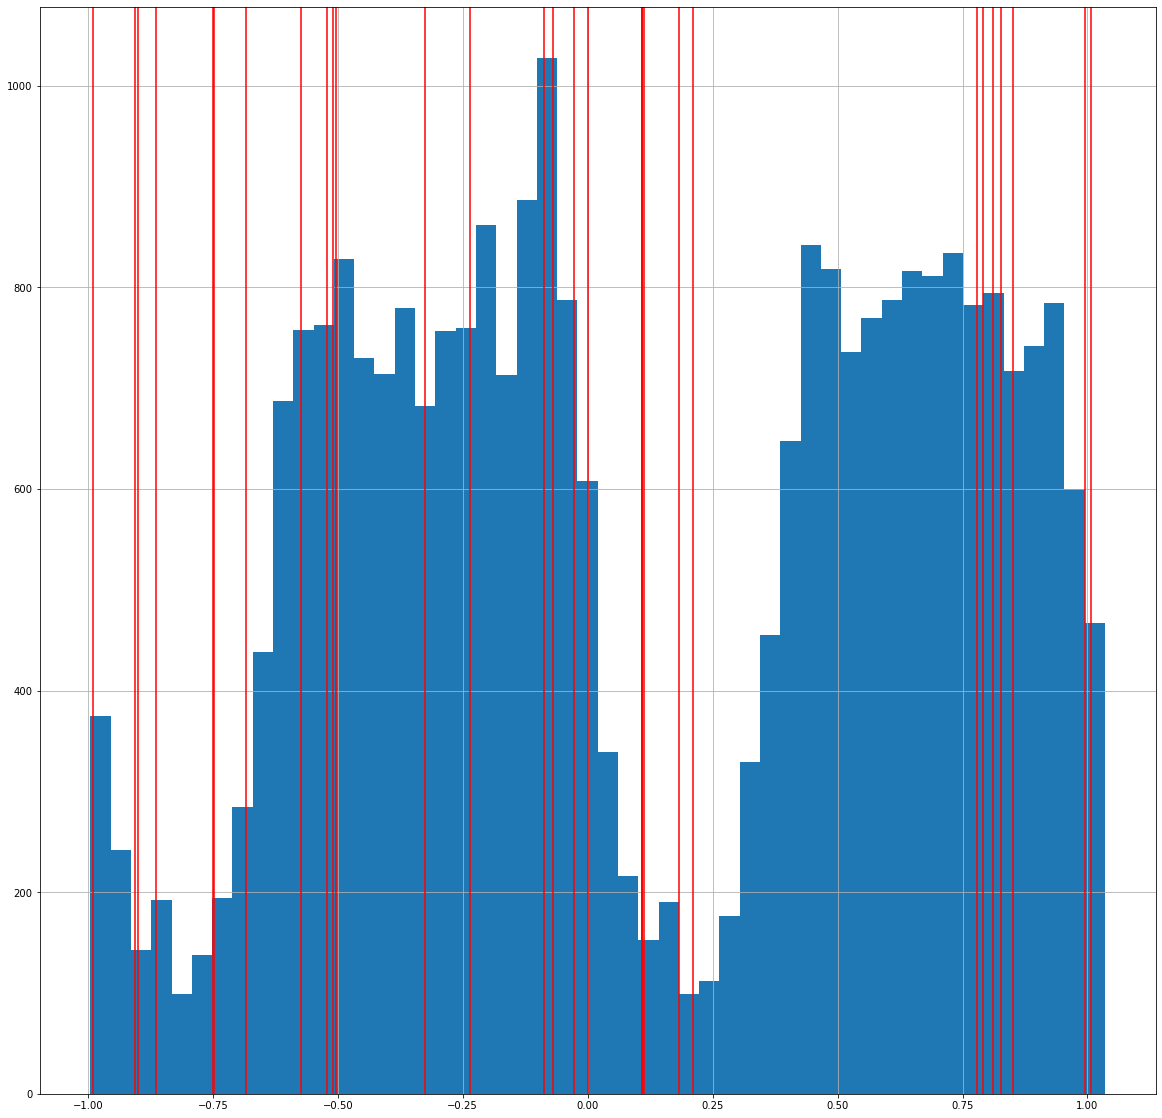

In [75]:
val_re["V30"].hist(bins = 50, figsize = (20,20))
plt.axvline(val_fraud.loc[71]["V30"],color="red")
plt.axvline(val_fraud.loc[641]["V30"],color="red")
plt.axvline(val_fraud.loc[677]["V30"],color="red")
plt.axvline(val_fraud.loc[836]["V30"],color="red")
plt.axvline(val_fraud.loc[1196]["V30"],color="red")
plt.axvline(val_fraud.loc[1201]["V30"],color="red")
plt.axvline(val_fraud.loc[1547]["V30"],color="red")
plt.axvline(val_fraud.loc[3055]["V30"],color="red")
plt.axvline(val_fraud.loc[4039]["V30"],color="red")
plt.axvline(val_fraud.loc[4267]["V30"],color="red")
plt.axvline(val_fraud.loc[4396]["V30"],color="red")
plt.axvline(val_fraud.loc[7702]["V30"],color="red")
plt.axvline(val_fraud.loc[9326]["V30"],color="red")
plt.axvline(val_fraud.loc[12377]["V30"],color="red")
plt.axvline(val_fraud.loc[12797]["V30"],color="red")
plt.axvline(val_fraud.loc[13706]["V30"],color="red")
plt.axvline(val_fraud.loc[14221]["V30"],color="red")
plt.axvline(val_fraud.loc[15027]["V30"],color="red")
plt.axvline(val_fraud.loc[15029]["V30"],color="red")
plt.axvline(val_fraud.loc[15030]["V30"],color="red")
plt.axvline(val_fraud.loc[15054]["V30"],color="red")
plt.axvline(val_fraud.loc[15345]["V30"],color="red")
plt.axvline(val_fraud.loc[15425]["V30"],color="red")
plt.axvline(val_fraud.loc[24110]["V30"],color="red")
plt.axvline(val_fraud.loc[24358]["V30"],color="red")
plt.axvline(val_fraud.loc[24742]["V30"],color="red")
plt.axvline(val_fraud.loc[25042]["V30"],color="red")
plt.axvline(val_fraud.loc[25504]["V30"],color="red")
plt.axvline(val_fraud.loc[27998]["V30"],color="red")
plt.axvline(val_fraud.loc[28146]["V30"],color="red")
plt.show()